## Problem Statement

What can data tell you about a current socio economic scenario.

## Data Source

Dataset used for this problem is sourced from [HELP International @ Kaggle](https://www.kaggle.com/gauravduttakiit/help-international?select=data-dictionary.csv). Basic understanding of economics tells us about various factors such as GDP, income, inflation etc. influencing the economic scenario of any country. The dataset contains data including these and additional factors spanning across multiple countries. This gives an opportunity to analyze and compare the socio economic scenario for each country and draw inferences which can help us make informed decisions.

## Objective

We will use the available dataset from an international humanitarian NGO to understand the factors influencing the socio economic scenario of different countries. Also, based on the findings, we can derive inferences such as which countries are in need for aid, thus driving our CSR strategy. Similarly, we an also infer which countries can be considered safe for business investments.

## 1. Read and Understand dataset

In [433]:
# Installating required libraries
# Please uncomment the following if executing for the first time.

# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install scipy
# !pip install sns

In [434]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [435]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')
import itertools
%matplotlib inline

In [436]:
# Reading the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [437]:
# Check the number of rows and columns in the dataframe
country_df.shape

(167, 10)

In [438]:
# Check the datatype of the dataset
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [439]:
# Check the summary for the numeric columns
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Clean the data

## 2.1 Null Value Check

In [440]:
# checking for percentage of null values in the dataframe application_data.csv
(country_df.isnull().sum()/ len(country_df) *100).sort_values(ascending = False)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [441]:
# Duplicates check
country_df.duplicated().value_counts()

False    167
dtype: int64

#### The Dataset almost clean as it does not have any null values as well as no duplicates in it

## 2.2 Data Transformation

#### Rational Behind Data Transformation:

In the dataset, imports, exports and health are presented as percentage of GDP per capita. While percentage values can provide a quick insight on a same scale, the absolute values might vary. To ensure these values do not affect our analysis, its best to convert these attributes to their absolute values.


In [442]:
# Converting imports, exports and health spending percentages to absolute values.

country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 3. Exploratory data analysis

## 3.1 Univariate Analysis

Univariate analysis is carried out to check the skewness of the data and identify outliers.

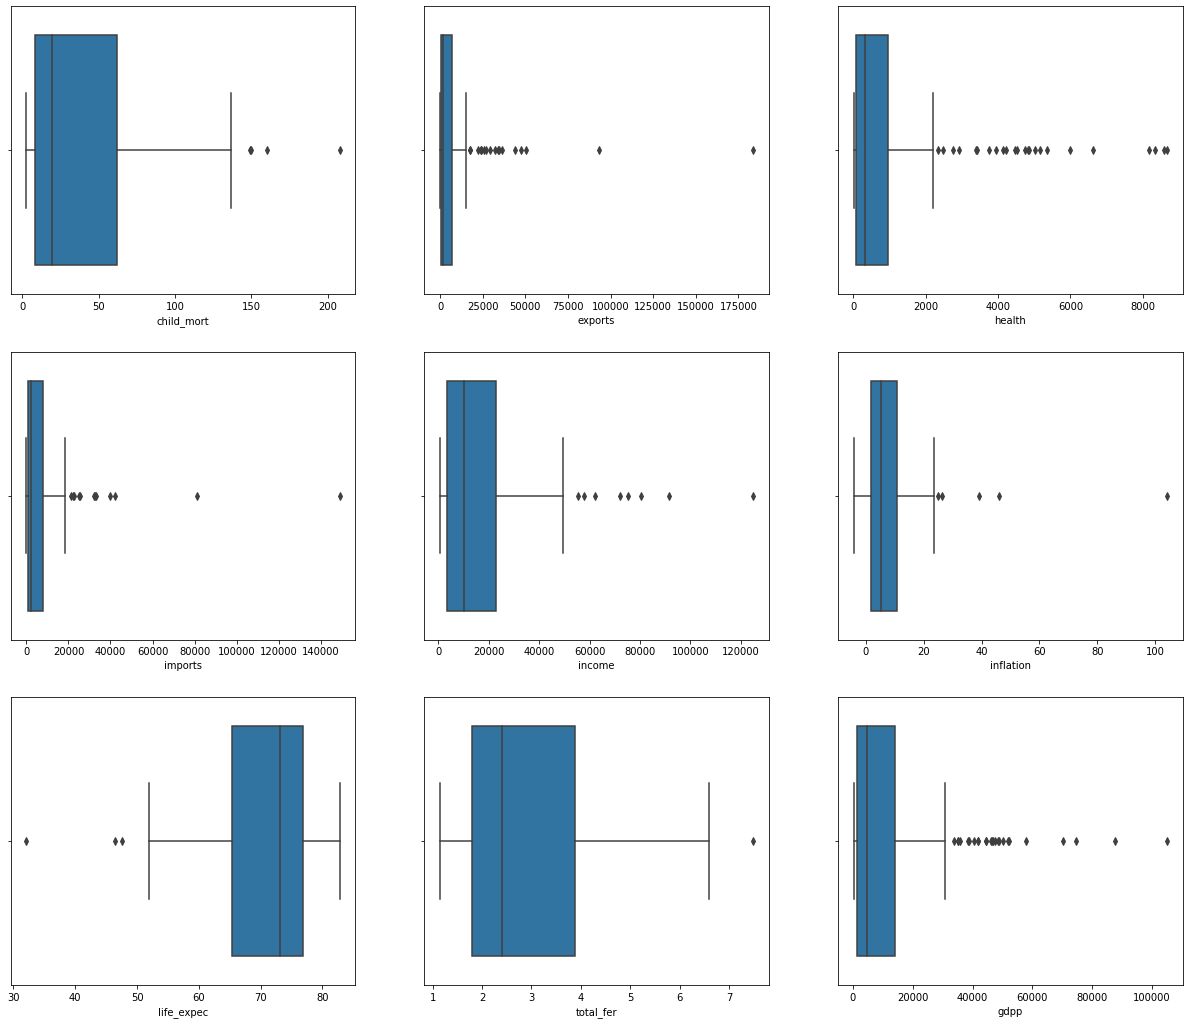

In [443]:
#Analysis of Outliers for the following column using Boxplot.
plt.figure(figsize = (21,18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): # first column is 'country'. So, dropped it.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

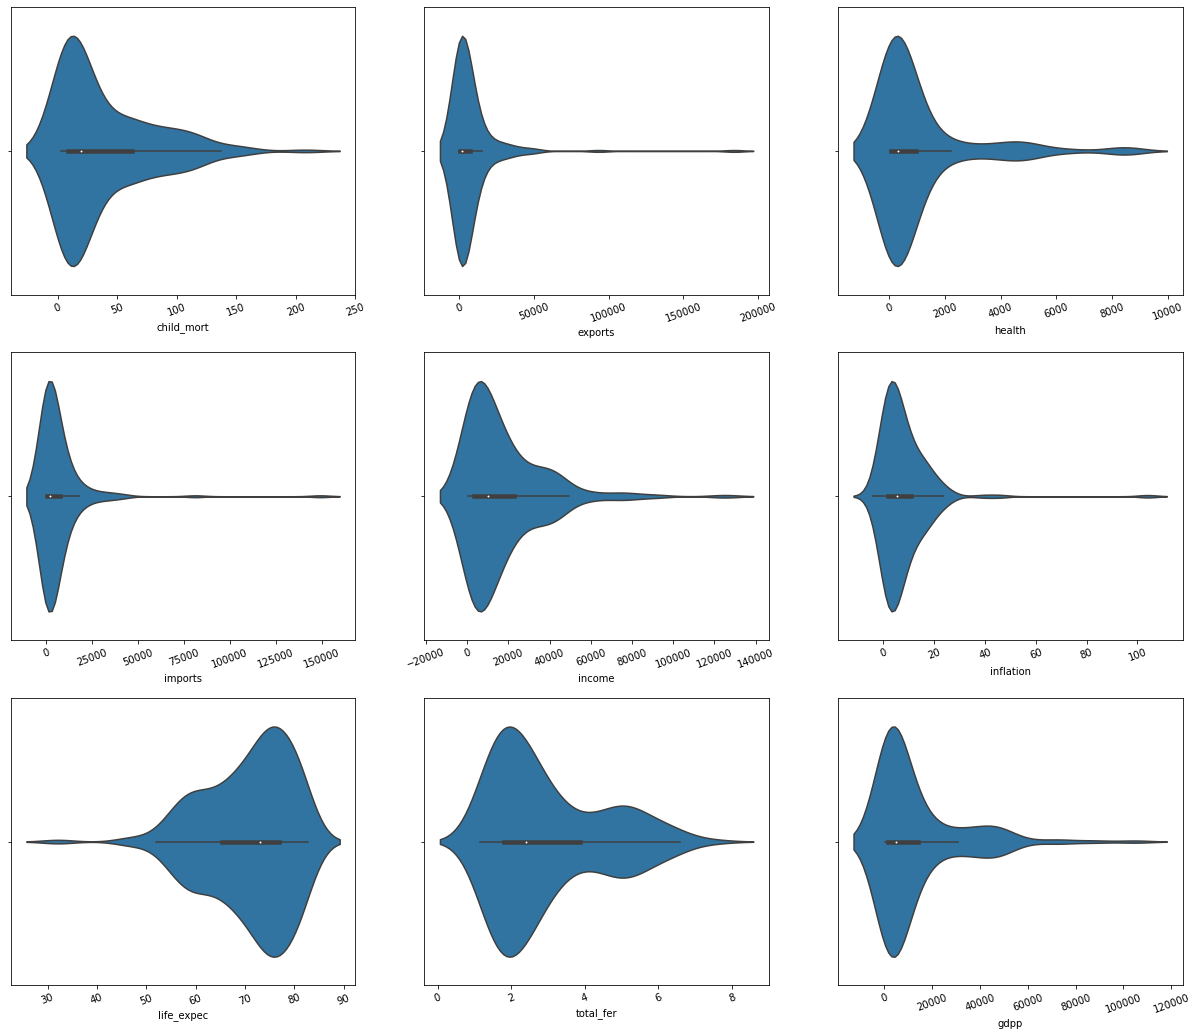

In [444]:
#Analysis of Outliers for the following column using Violin graph.
plt.figure(figsize=(21, 18))
num_var = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(num_var):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.violinplot(country_df[i[1]])
    plt.xticks(rotation=20)

#### Inference from above two plots:
> - All variables have some outliers.
> - If we apply the outliers treatment by deleting the outlier on this dataset,This may affect those countries which are in need of aid
> - Plan of action in this dataset is that we will apply soft Capping: we will use  1st and 99th percentile cutoff, which will least distrubing the data and the data will not get changed that much.

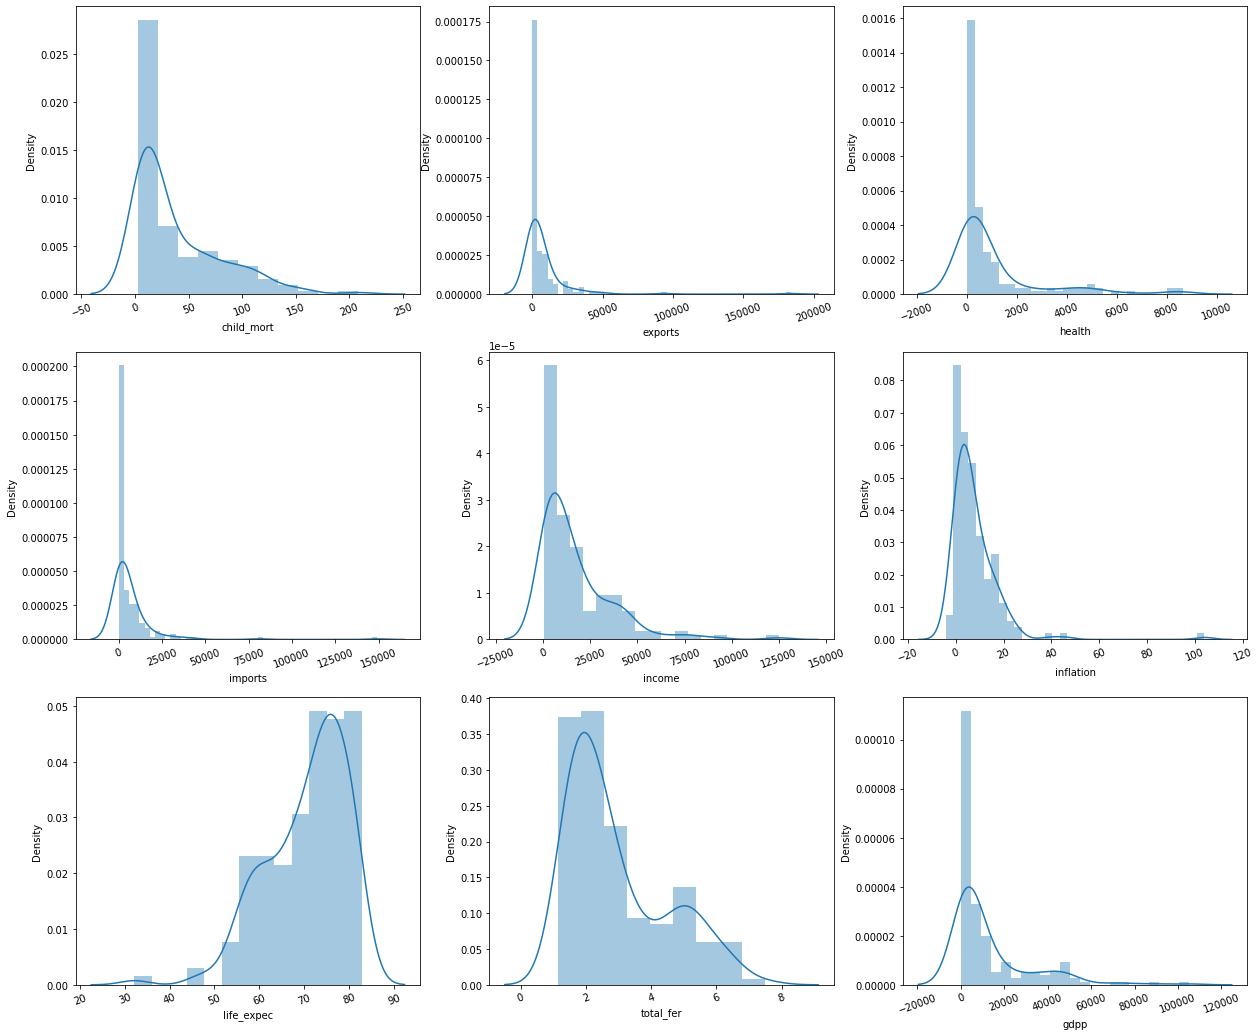

In [445]:
# Analysis of columns using distplot
plt.figure(figsize=(21, 18))
num_var = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(num_var):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country_df[i[1]])
    plt.xticks(rotation=20)

#### Inference:
> - Majority of the data points are not having Normal distribution except Inflation. Hence above dataset shows that there is presence of clusters.
> - life_expec is left shewed and all other datapoint are Right Shewed.
> - Variance is not uniform for all the data points.
> - Range is not same for all data points.
> - We need to standardize data to overcome all the above concerns.
> - It is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

## 3.2 Bivariate Analysis

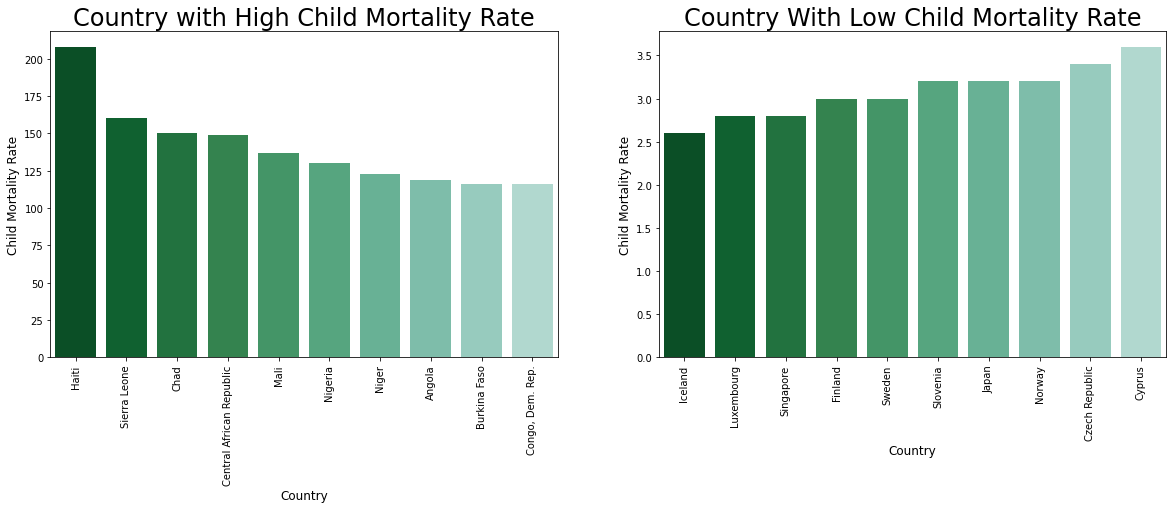

In [446]:
# Child Mortality Rate: Death of children under 5 years of age per 1000 live births
top_10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
bottom_10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_child_mort.country, top_10_child_mort.child_mort, palette=sns.color_palette("BuGn_r", n_colors=len(top_10_child_mort) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Child Mortality Rate" , size = 12 )
chart.set_title( "Country with High Child Mortality Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_child_mort.country, bottom_10_child_mort.child_mort, palette=sns.color_palette("BuGn_r", n_colors=len(bottom_10_child_mort) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Child Mortality Rate" , size = 12 )
chart.set_title( "Country With Low Child Mortality Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()



#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of child mortality rate, i.e. death of children under 5 years of age per 1000 live births. Based on economic principles, the following inferences can be drawn:
    - Among all the factors, countries with high child mortality may indicate poor health facilities, lower per capita incomes overall lower GDP. From the graph above, we can see Haiti has the highest child mortality rate. Such countries might be in need of AID
    - Developed countries tend to have better access to health infrastructure and facilities, thus reducing child mortality. From the graph above, we can see Iceland has the lowest child mortality rate. Such countries might not require AID

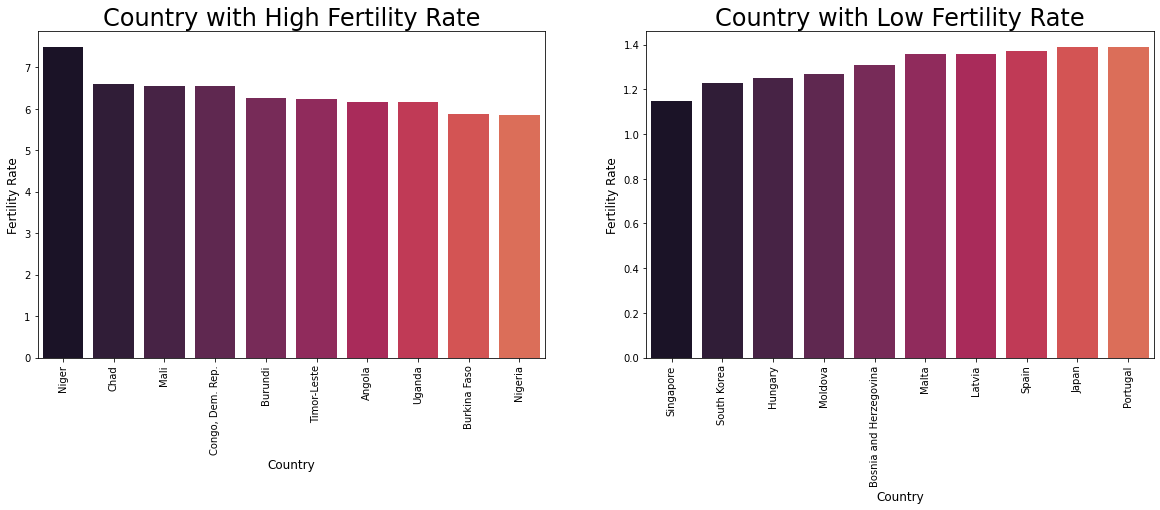

In [447]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top_10_fertility_rate = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
bottom_10_fertility_rate  = country_df[['country','total_fer']].sort_values('total_fer', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_fertility_rate.country, top_10_fertility_rate.total_fer, palette=sns.color_palette("rocket", n_colors=len(top_10_fertility_rate) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Fertility Rate" , size = 12 )
chart.set_title("Country with High Fertility Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_fertility_rate.country, bottom_10_fertility_rate.total_fer, palette=sns.color_palette("rocket", n_colors=len(bottom_10_fertility_rate) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Fertility Rate" , size = 12 )
chart.set_title("Country with Low Fertility Rate" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of fertility rate, i.e. number of children born to each woman if the current age-fertility rates remain the same. Based on economic principles, the following inferences can be drawn:
    - Countries with high fertility rate may indicate lower per capita incomes and overall lower GDP. From the graph above, we can see Niger has the highest fertility rate. Such countries might be in need of AID
    - Developed countries tend to be better educated, and keep a check on family size, thus resulting in lower fertility rate. From the graph above, we can see Singapore has the lowest fertility rate. Such countries might not require AID

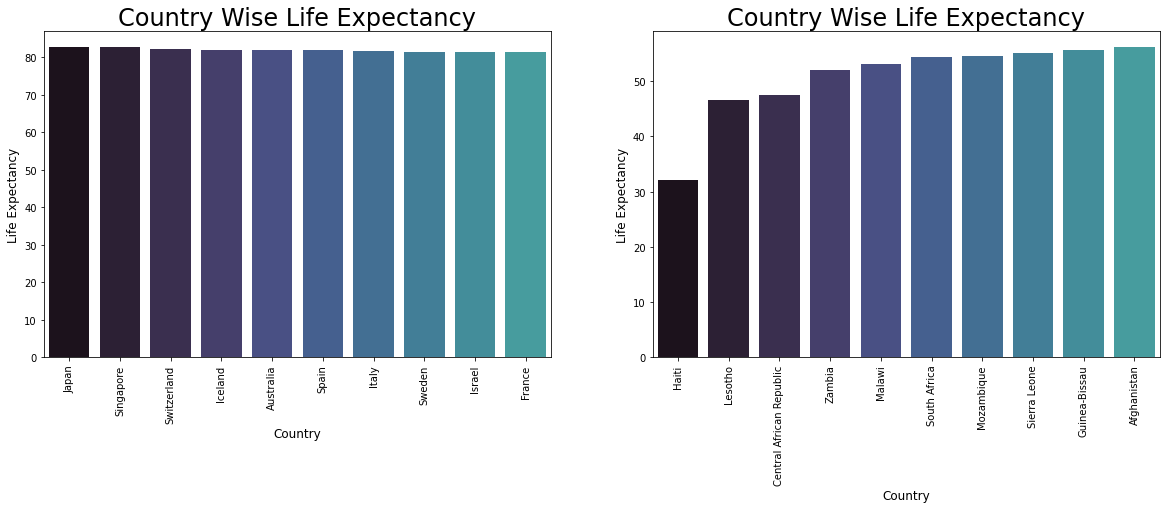

In [448]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
top_10_Life_Expectancy = country_df[['country','life_expec']].sort_values('life_expec', ascending = False).head(10)
bottom_10_Life_Expectancy = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_Life_Expectancy.country, top_10_Life_Expectancy.life_expec, palette=sns.color_palette("mako", n_colors=len(top_10_Life_Expectancy) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Life Expectancy" , size = 12 )
chart.set_title("Country Wise Life Expectancy" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_Life_Expectancy.country, bottom_10_Life_Expectancy.life_expec, palette=sns.color_palette("mako", n_colors=len(bottom_10_Life_Expectancy) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Life Expectancy" , size = 12 )
chart.set_title("Country Wise Life Expectancy" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of life expectancy, i.e. number of years a person is expected to live. Based on economic principles, the following inferences can be drawn:
    - Countries with higher life expectancy may indicate better health services, high per capita income and high GDP. From the graph above, we can see Japan has the highest life expectancy rate. Such countries might not be in need of AID
    - Under developed countries tend to have limited access to health infrastructure and limited per capita income resulting in lower life expectancy. From the graph above, we can see Haiti has the lowest life expectancy. Such countries might require AID


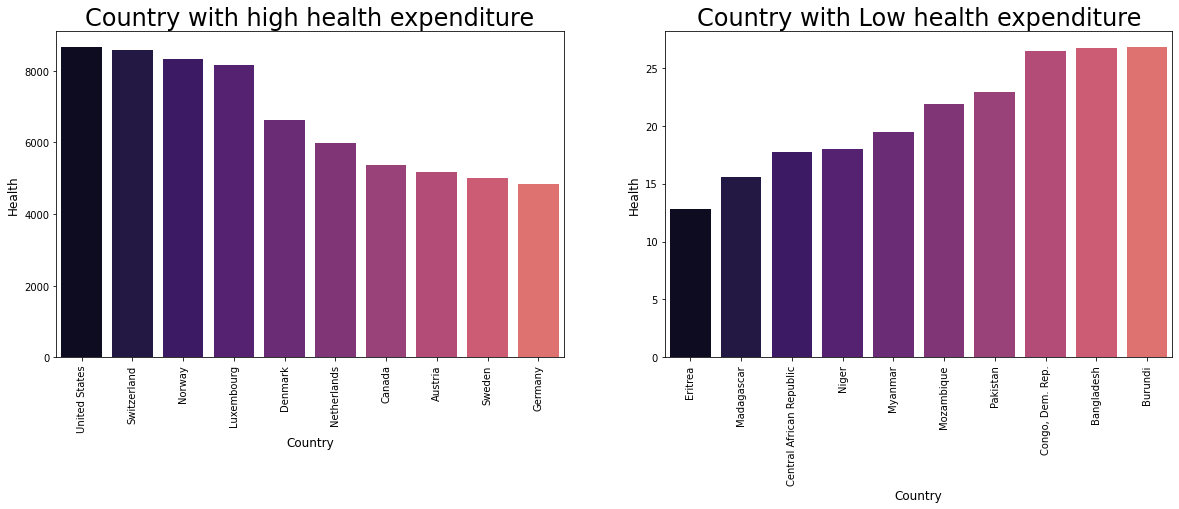

In [449]:
# Health :Total health spending as %age of Total GDP.
top_10_Health = country_df[['country','health']].sort_values('health', ascending = False).head(10)
bottom_10_Health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_Health.country, top_10_Health.health, palette=sns.color_palette("magma", n_colors=len(top_10_Health) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Health" , size = 12 )
chart.set_title("Country with high health expenditure" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_Health.country, bottom_10_Health.health, palette=sns.color_palette("magma", n_colors=len(bottom_10_Health) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Health" , size = 12 )
chart.set_title("Country with Low health expenditure" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of their annual spend on health infrastructure, i.e. total health spending per capita. Based on economic principles, the following inferences can be drawn:
    - Countries with higher spends on health infrastructure may indicate better health services, high per capita income and high GDP. From the graph above, we can see United States has the highest health expenditure. Such countries might not be in need of AID
    - Under developed countries having lower GDP and limited income have financial constraints in spending on health infrastructure. From the graph above, we can see Eritrea has the lowest health expenditure. Such countries might require AID



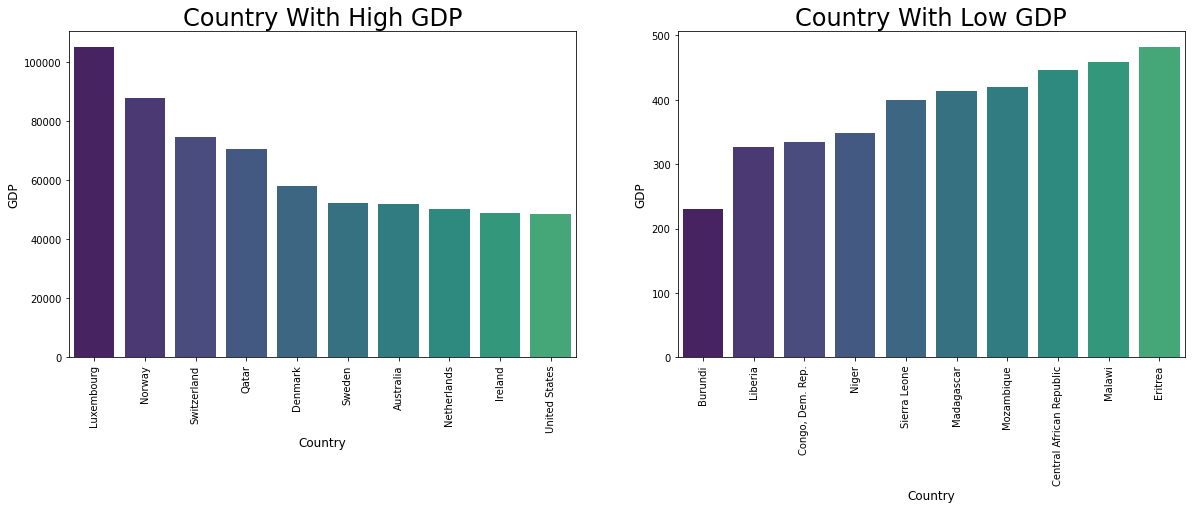

In [450]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
top_10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = False).head(10)
bottom_10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

chart = sns.barplot(top_10_gdpp.country, top_10_gdpp.gdpp, palette=sns.color_palette("viridis", n_colors=len(top_10_gdpp) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("GDP" , size = 12 )
chart.set_title("Country With High GDP" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_gdpp.country, bottom_10_gdpp.gdpp, palette=sns.color_palette("viridis", n_colors=len(bottom_10_gdpp) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("GDP" , size = 12 )
chart.set_title("Country With Low GDP" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of their GDP i.e. the total monetary value of all final goods and services produced (and sold on the market) within a country during a period of time (typically 1 year). Based on economic principles, the following inferences can be drawn:
    - Countries with higher GDP may indicate better health services and high per capita income. From the graph above, we can see Luxembourg has the highest GDP. Such countries might not be in need of AID
    - Under developed countries having lower GDP and limited income result in high child mortality and lower life expectancy. From the graph above, we can see Burundi has the lowest GDP. Such countries might require AID




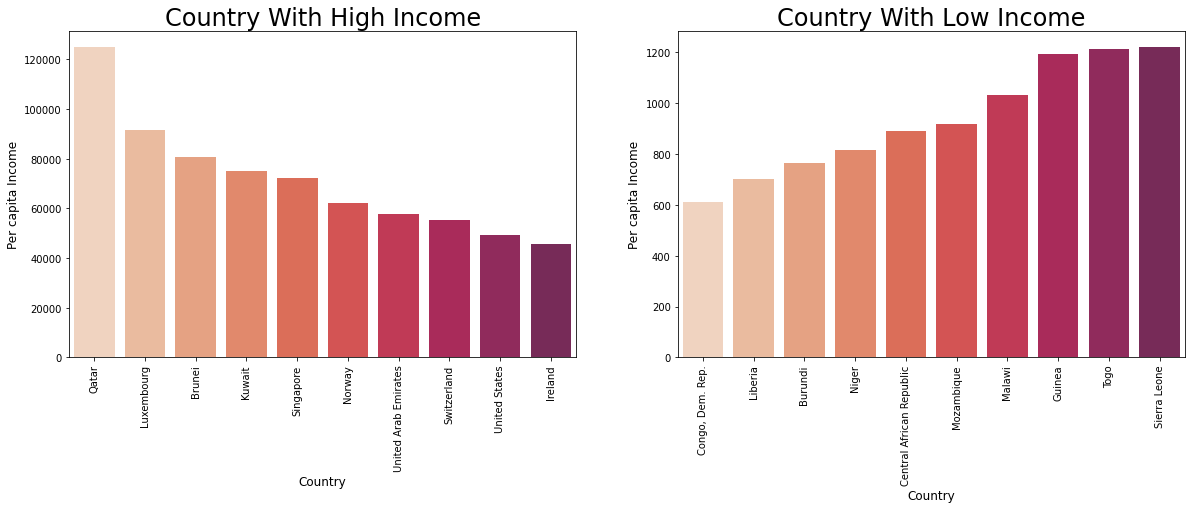

In [451]:
# Income : Net income per person
top_10_income = country_df[['country','income']].sort_values('income', ascending = False).head(10)
bottom_10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_income.country, top_10_income.income, palette=sns.color_palette("rocket_r", n_colors=len(top_10_income) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Per capita Income" , size = 12 )
chart.set_title("Country With High Income" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_income.country, bottom_10_income.income, palette=sns.color_palette("rocket_r", n_colors=len(bottom_10_income) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Per capita Income" , size = 12 )
chart.set_title("Country With Low Income" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of their per capita income. Based on economic principles, the following inferences can be drawn:
    - Countries with higher per caipta income may indicate better health services and higher GDP. From the graph above, we can see Qatar has the highest per capita income. Such countries might not be in need of AID
    - Under developed countries having lower per capita income result in lower GDP. From the graph above, we can see Congo, Dem. Rep has the lowest per capita income. Such countries might require AID





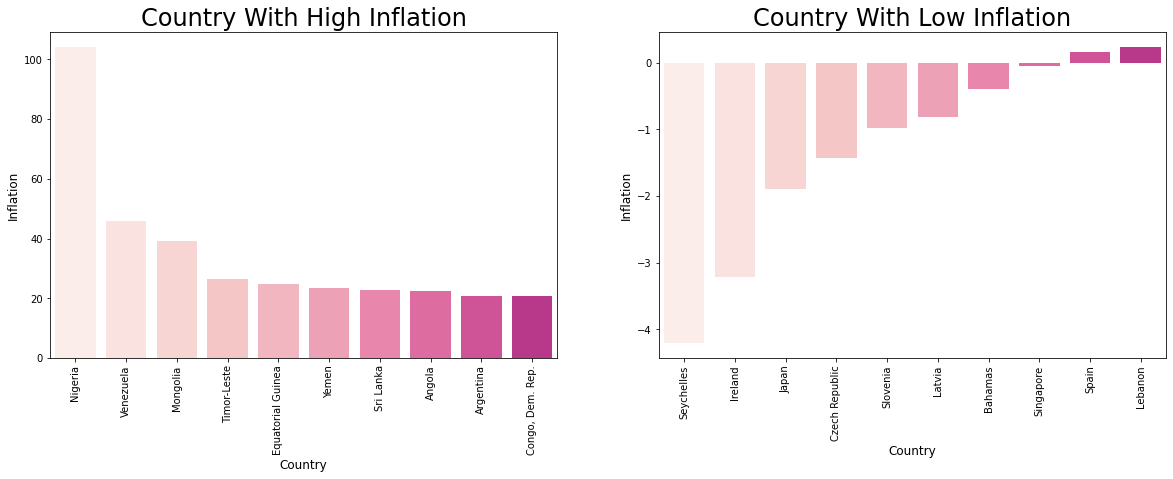

In [452]:
# Inflation: The measurement of the annual growth rate of the Total GDP
top_10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
bottom_10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
chart = sns.barplot(top_10_inflation.country, top_10_inflation.inflation, palette=sns.color_palette("RdPu", n_colors=len(top_10_inflation) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Inflation" , size = 12 )
chart.set_title("Country With High Inflation" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_inflation.country, bottom_10_inflation.inflation, palette=sns.color_palette("RdPu", n_colors=len(bottom_10_inflation) + 4))
chart.set_xlabel("Country" , size = 12 )
chart.set_ylabel("Inflation" , size = 12 )
chart.set_title("Country With Low Inflation" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of inflation, i.e. rate of rise in prices. Based on economic principles, the following inferences can be drawn:
    - Countries with higher inflation may indicate lower per capita income, lower GDP and limited spend on health care. From the graph above, we can see Nigeria has the highest inflation. Such countries might be in need of AID
    - Developed countries having lower inflation result in  higher per capita income, improving the purchase/spend capacity of an individual on health services, thus resulting in higher GDP. From the graph above, we can see Seychelles has the lowest inflation. Such countries might not require AID






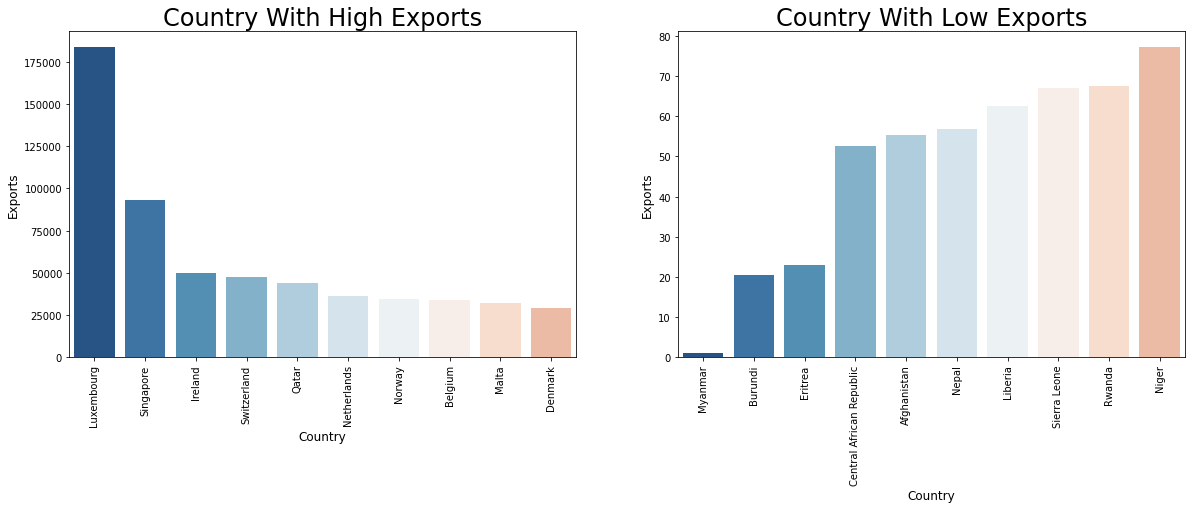

In [453]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
top_10_export = country_df[['country','exports']].sort_values('exports', ascending = False).head(10)
bottom_10_export = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

chart = sns.barplot(top_10_export.country, top_10_export.exports, palette=sns.color_palette("RdBu_r", n_colors=len(top_10_export) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Exports" , size = 12 )
chart.set_title( "Country With High Exports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_export.country, bottom_10_export.exports, palette=sns.color_palette("RdBu_r", n_colors=len(bottom_10_export) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Exports" , size = 12 )
chart.set_title( "Country With Low Exports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of Exports. Based on economic principles, the following inferences can be drawn:
    - Countries with higher exports may indicate higher per capita income and higher GDP. From the graph above, we can see Luxembourg has the highest exports. Such countries might not be in need of AID
    - Under developed or developing countries have lower trade exports indicating lower per capita income and a weak economy, hence lower GDP. From the graph above, we can see Myannmar has the lowest exports. Such countries might require AID







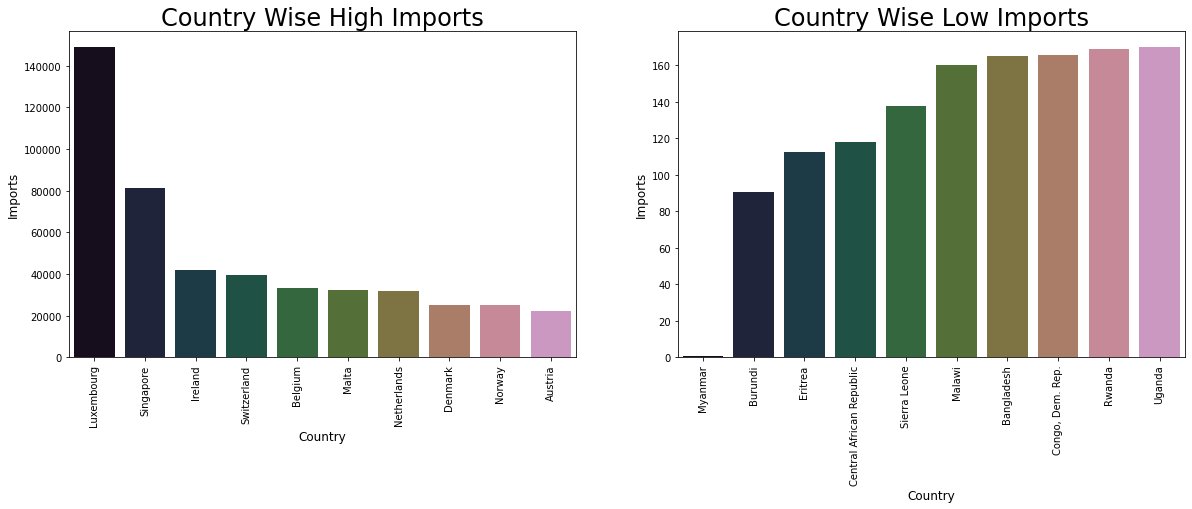

In [454]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
top_10_import = country_df[['country','imports']].sort_values('imports', ascending = False).head(10)
bottom_10_import = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)

chart = sns.barplot(top_10_import.country, top_10_import.imports, palette=sns.color_palette("cubehelix", n_colors=len(top_10_import) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Imports" , size = 12 )
chart.set_title( "Country Wise High Imports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
chart = sns.barplot(bottom_10_import.country, bottom_10_import.imports, palette=sns.color_palette("cubehelix", n_colors=len(bottom_10_import) + 4))
chart.set_xlabel( "Country" , size = 12 )
chart.set_ylabel( "Imports" , size = 12 )
chart.set_title( "Country Wise Low Imports" , size = 24 )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


#### Inferences :

- The above graphs show top 10 and bottom 10 countries ranked on the basis of Imports. Based on economic principles, the following inferences can be drawn:
    - Countries with higher imports may indicate higher per capita income and higher GDP. From the graph above, we can see Luxembourg spends the most on import of goods and services. Such countries might not be in need of AID
    - Under developed or developing countries have lower imports indicating lower per capita income and a weak economy, hence lower GDP. From the graph above, we can see Myannmar spends the least on imports. Such countries might require AID



## 3.3 Multivariate Analysis

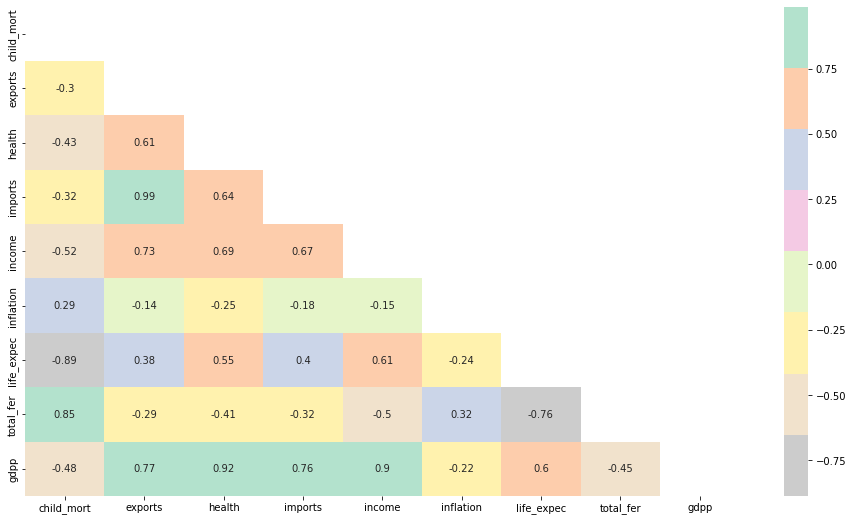

In [455]:
# check the correlation coefficients to see which variables are highly correlated

corr = country_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Pastel2_r', annot = True)

plt.show()

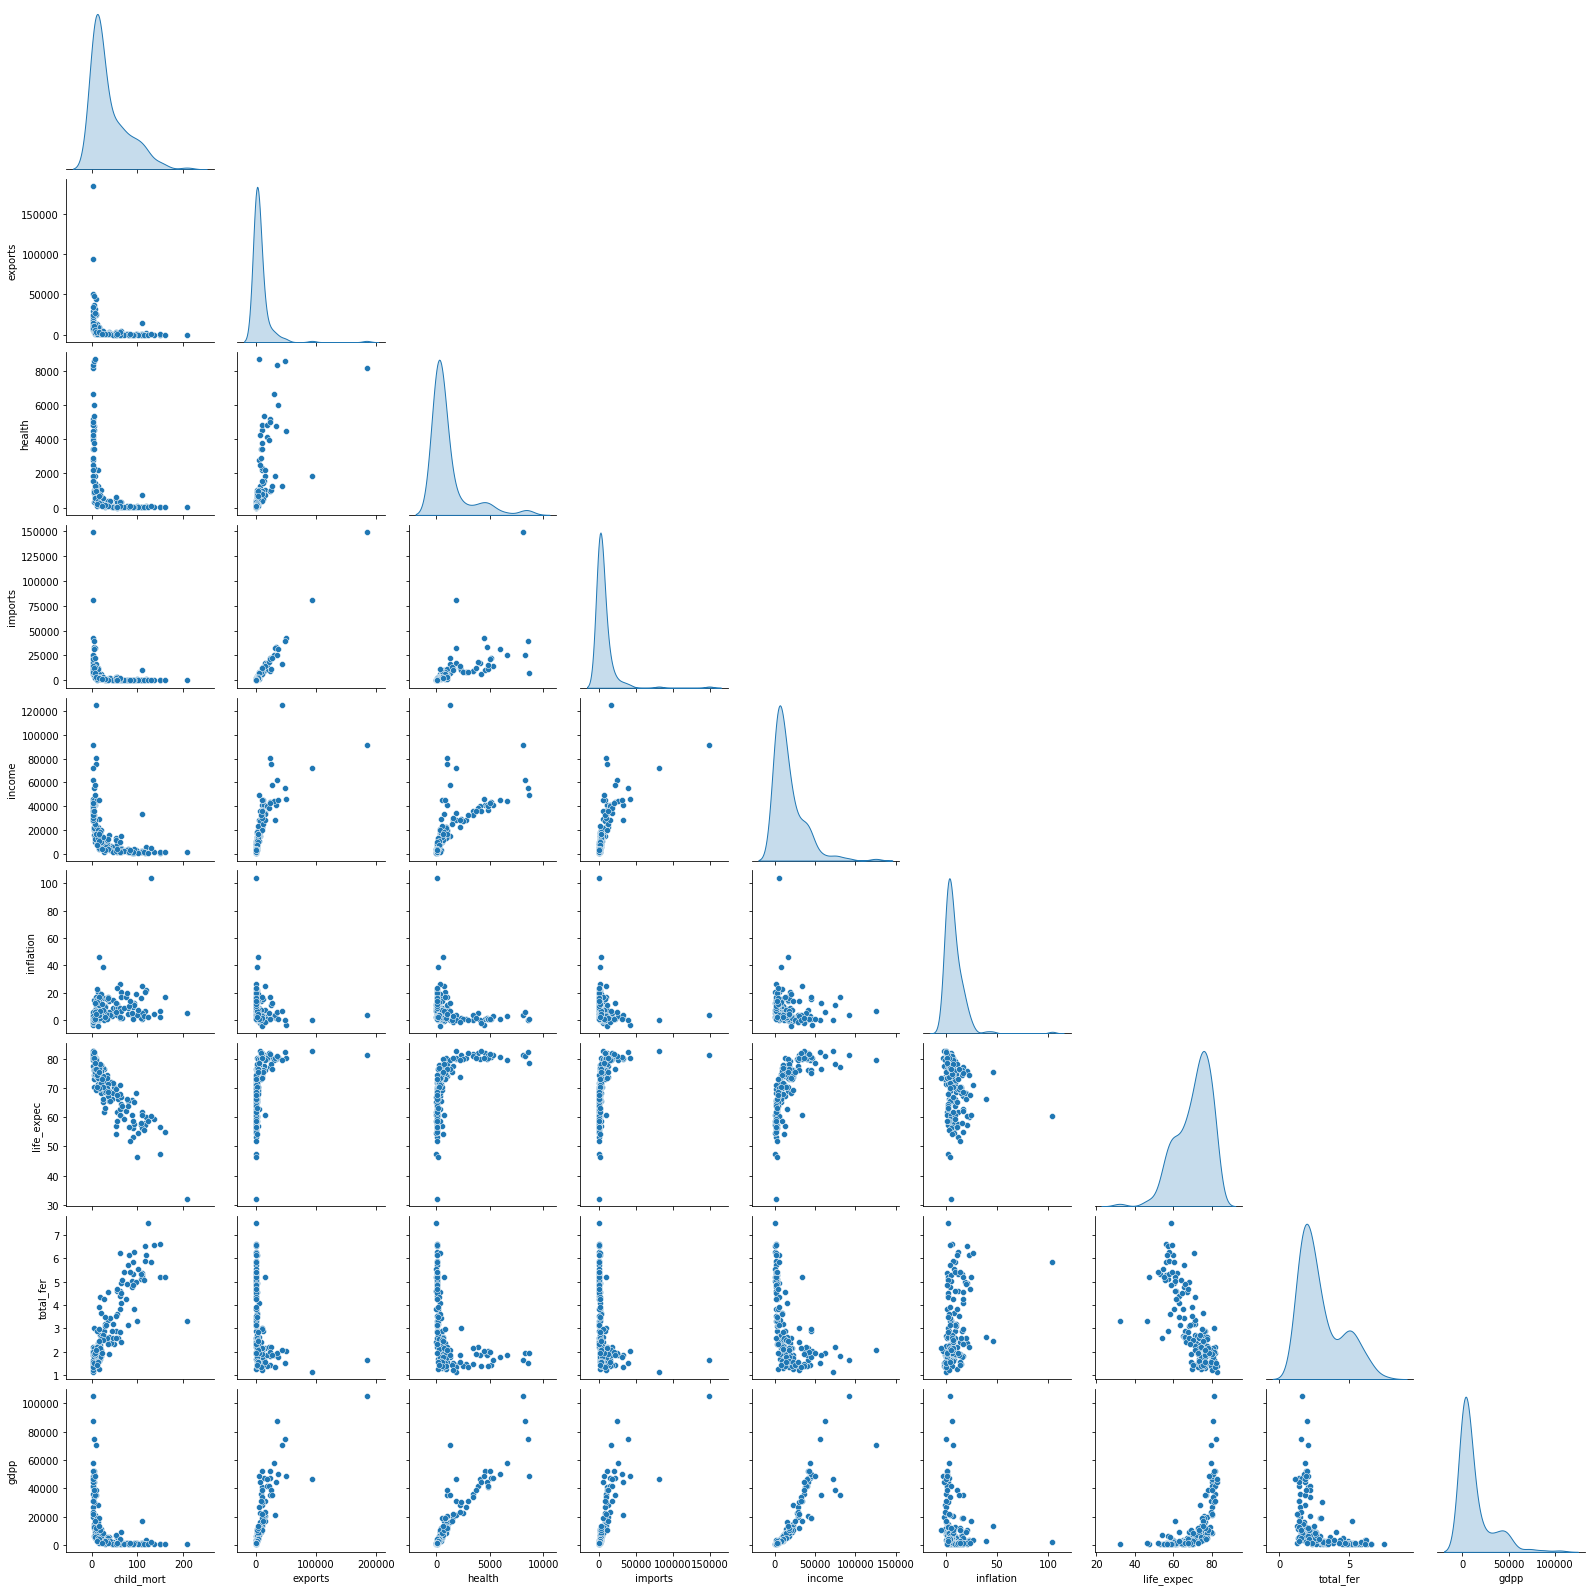

In [456]:
# pairplot for continuous data type
sns.pairplot(country_df.select_dtypes(['int64','float64']), diag_kind='kde', corner=True)
plt.show()

#### Inference:

From the above graph, we can conclude the following:

- Child mortality and life expectancy are inversely proportional.
- Imports and Exports are directly proportional.
- Health, Income and GDP are directly proportional to each other.
- Life expectancy and fertility rate are inversely proportional.


All the above factors heavily influence the socio economic scenario of a country. Analyzing the data and understanding the correlation between individual data points can give us an insight into the economic health of a country.

# 4 Data Preparation For Modelling 

## 4.1 Outlier Treatment

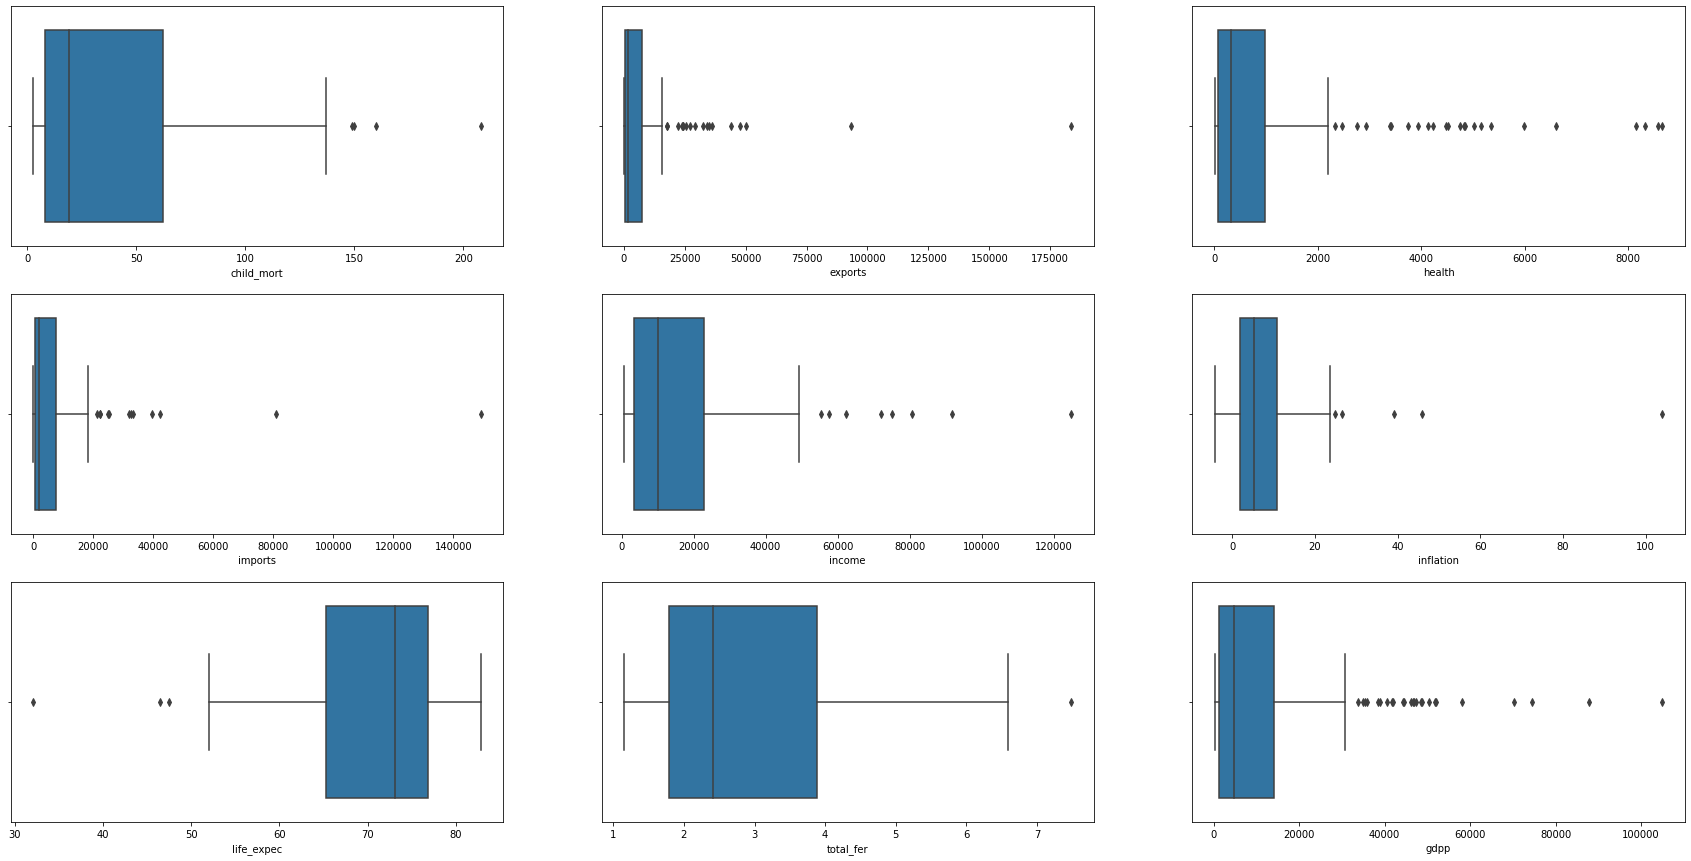

In [457]:
# Outliers Treatment
plt.figure(figsize = (30,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): # first column is 'country'. So, dropped it.
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

#### Observation and Action Item:

- All variables has some outliers.
- We will be doing Soft capping as the data points are few and the capping should not influence the clusters much.

In [458]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


##### Point to Note Before Outlier Treatment:
- child_mort has outlier in the upper side of the Box plot. Higher Value of child_mort is critical for those countries which are in need of aid, hence we will not  cap in child_mort.
- life_expec has outlier in the lower side of the Box plot. Lower value of life_expec generally shows lower income and lower spent in health care sector. Hence we will keep it as it is.
- For exports, health, imports, income, total_fer, gdpp and Inflation we will apply soft capping in the upper quatile of 0.99 and no Lower capping for Outliers.

In [459]:
#finding the 99th percentile value to cap
upper_gdpp = country_df['gdpp'].quantile(0.99)
upper_income = country_df['income'].quantile(0.99)
upper_health = country_df['health'].quantile(0.99)
upper_import = country_df['imports'].quantile(0.99)
upper_export = country_df['exports'].quantile(0.99)
upper_inflation = country_df['inflation'].quantile(0.99)

# capping the gdpp and income values
country_df['gdpp'][country_df['gdpp']>upper_gdpp] = upper_gdpp
country_df['income'][country_df['income']>upper_income] = upper_income
country_df['health'][country_df['health']>upper_health] = upper_health
country_df['imports'][country_df['imports']>upper_import] = upper_import
country_df['exports'][country_df['exports']>upper_export] = upper_export
country_df['inflation'][country_df['inflation']>upper_inflation]= upper_inflation

In [460]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.800000,7.490000,79088.000000


## 4.2 Data Scaling

Feature scaling is essential for machine learning algorithms that calculate distances between data.
Most of distance based models e.g. k-means and Hierarchical clustering need standard scaling so that large-scaled features don't dominate the variation. If we do not scale, the feature with a higher value range starts dominating when calculating distances

**We have chosen StandardScaler as clustering does not work well when the variance differs a lot.**

StandardScaler() will transform each value in the column to range between the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. 

In [461]:
# Dropping the country columns and assigning the other column in new dataset called features
num_cols = country_df.drop(["country"],axis = 1)
features = num_cols.columns
num_cols.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [462]:
# Standard scaling
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(num_cols)
country_scaled

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [463]:
#Converting it into a dataframe
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = features

country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.541946,-0.032042


# 5 Model Building

## 5.1 Hopkins statistic

In [464]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [465]:
hopkins(country_scaled)

0.8742120411920089

### Hopkins score is more than 0.85  and closer to 1 which means our data has a high tendency to cluster.

# 6 Hierarchical Clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

## 6.1 Single Linkage Hierarchical Clustering

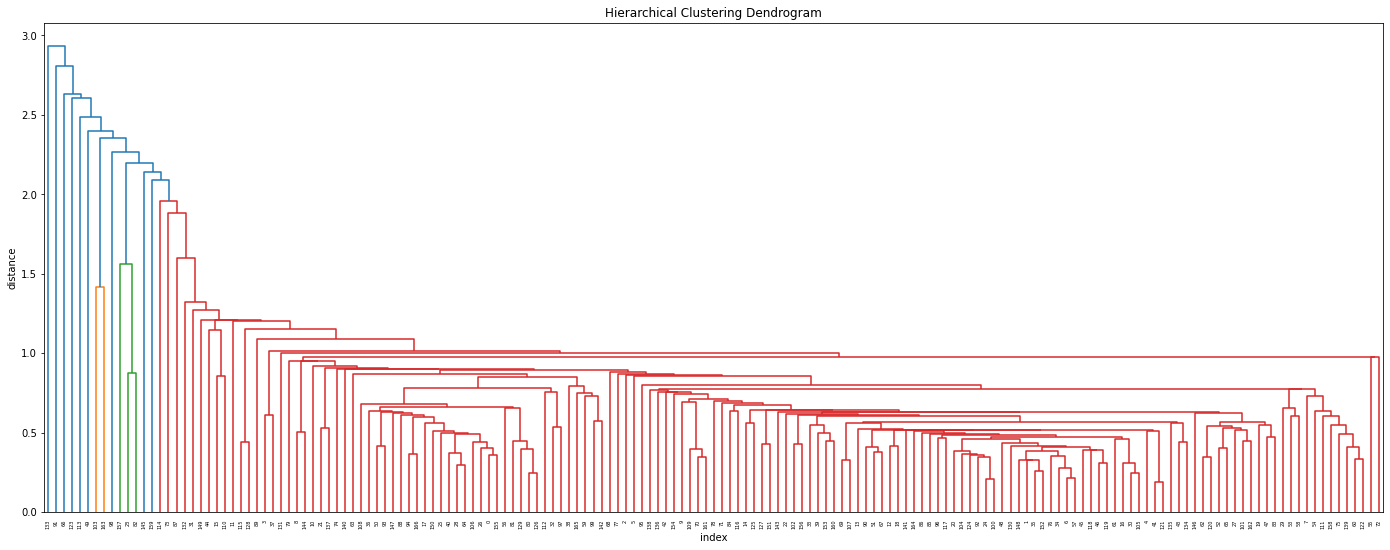

In [466]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(24, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

##### Inference :
- Single linkage Hierarchical Clustering, in this case, did not give a suitable result for clustering 

## 6.2 Complete Linkage Hierarchical Clustering

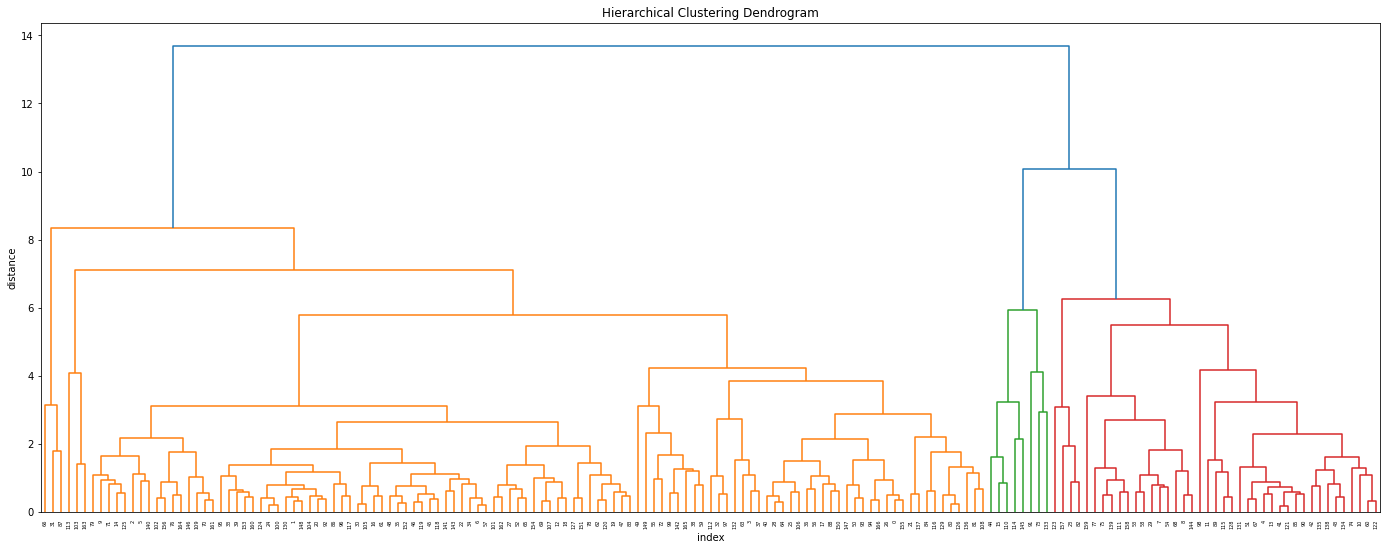

In [467]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

plt.figure(figsize=(24, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

##### Inference:

- From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. We will consider Complete linkage for further analysis
-  We will build two iterations of clustering with 3 and 4 clusters and analyse the output.

## 6.3 First Iteration With Cluster = 3

In [468]:
# 3 Cluster
her_cluster_label_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
her_cluster_label_3

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [469]:
# assign cluster labels
country_df_her = country_df.copy()
country_df_her['her_cluster_label_3'] = her_cluster_label_3
country_df_her.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [470]:
# Check the distribution of countries in each Clusters.
country_df_her["her_cluster_label_3"].value_counts()

0    118
1     41
2      8
Name: her_cluster_label_3, dtype: int64

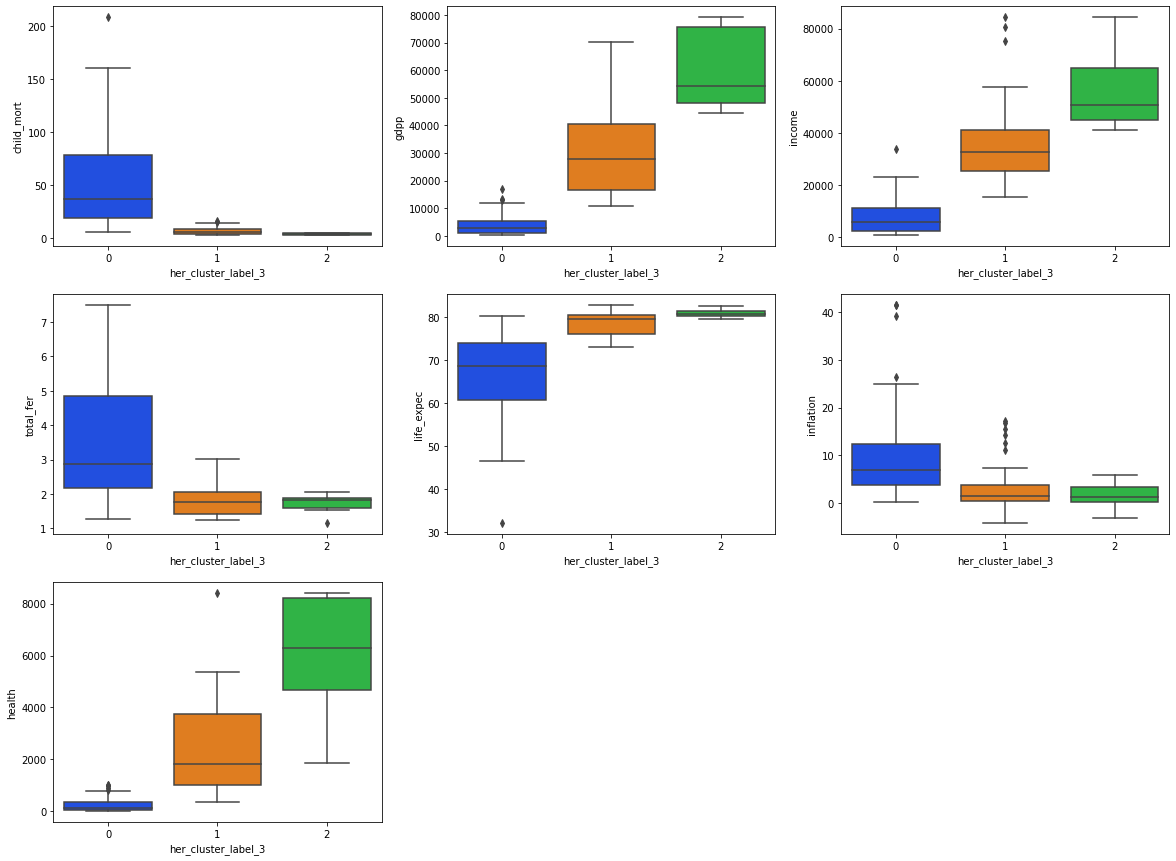

In [471]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='her_cluster_label_3', y='child_mort', data=country_df_her, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='her_cluster_label_3', y='gdpp', data=country_df_her, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='her_cluster_label_3', y='income', data=country_df_her, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='her_cluster_label_3', y='total_fer', data=country_df_her, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='her_cluster_label_3', y='life_expec', data=country_df_her, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='her_cluster_label_3', y='inflation', data=country_df_her, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='her_cluster_label_3', y='health', data=country_df_her, palette="bright")


plt.show()

#### Inference:

The information from the above graphs is summarized in the following table:

| Atribute | Cluster 0 | Cluster 1 | Cluster 2 |
|----------|-----------|-----------|-----------|
| Child Mortality | High | Medium | Low |
| GDPP | Low | Medium | High |
| Income | Low | Medium | High |
| Fertility | High | Medium | Low |
| Life Expectancy | Low | Medium | High |
| Inflation | High | Low | Low |
| Health | Low | Medium | High |


In [472]:
# checking countries in cluster 2 

country_df_her[country_df_her['her_cluster_label_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2


In [473]:
# checking countries in cluster 1

country_df_her[country_df_her['her_cluster_label_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
4,Antigua and Barbuda,10.3,5551.0,735.6600,7185.8,19100.0,1.440,76.8,2.13,12200.0,1
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,1
13,Barbados,14.2,6320.0,1275.2000,7792.0,15300.0,0.321,76.7,1.78,16000.0,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,1
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,1
41,Croatia,5.5,5076.0,1047.6000,5143.5,20100.0,0.821,76.3,1.55,13500.0,1
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,1


In [474]:
# checking countries in cluster 0

country_df_her[country_df_her['her_cluster_label_3'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0


## 6.4 Second Iteration With Cluster = 4

In [475]:
# 4 Cluster
her_cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
her_cluster_labels_4

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       3, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [476]:
# assign cluster labels
country_df_her['her_cluster_labels_4'] = her_cluster_labels_4
country_df_her.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


In [477]:
# Check the distribution of countries in each Clusters.
country_df_her["her_cluster_labels_4"].value_counts()

0    115
1     41
2      8
3      3
Name: her_cluster_labels_4, dtype: int64

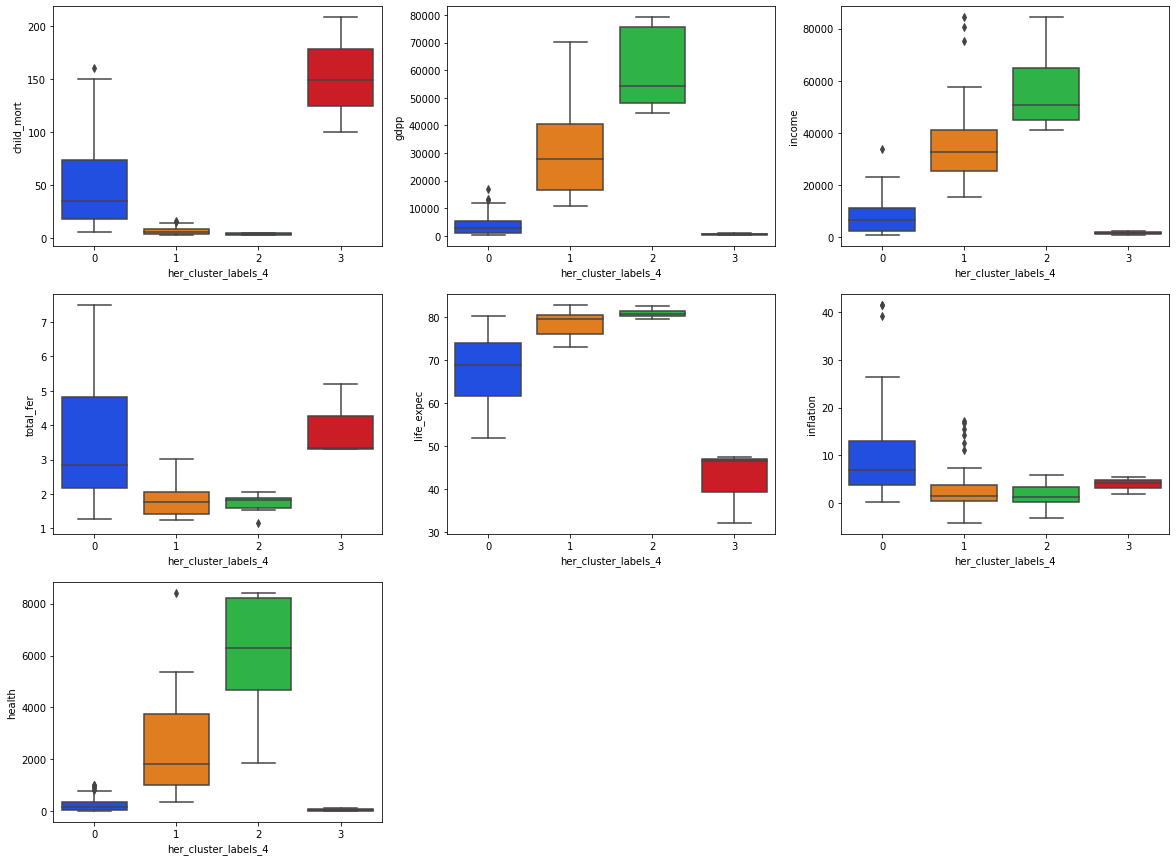

In [478]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='her_cluster_labels_4', y='child_mort', data=country_df_her, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='her_cluster_labels_4', y='gdpp', data=country_df_her, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='her_cluster_labels_4', y='income', data=country_df_her, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='her_cluster_labels_4', y='total_fer', data=country_df_her, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='her_cluster_labels_4', y='life_expec', data=country_df_her, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='her_cluster_labels_4', y='inflation', data=country_df_her, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='her_cluster_labels_4', y='health', data=country_df_her, palette="bright")


plt.show()

#### Observations:

- In the second Iteration, model has created a new cluster 3 with only three countries which has High Child mortality rate, High Fertility rate, Low life expectency, low income and low GDP.
- The countries belongs to the cluster 3 can be consider as under-developed countries

In [479]:
# checking countries in cluster 3

country_df_her[country_df_her['her_cluster_labels_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,3
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,0,3
87,Lesotho,99.7,460.980,129.8700,1181.700,2380.0,4.15,46.5,3.30,1170.0,0,3


In [480]:
# checking countries in cluster 2

country_df_her[country_df_her['her_cluster_labels_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,2,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,2,2
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,2,2
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,2,2
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,2,2
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,2,2
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,2,2
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,2,2


In [481]:
# checking countries in cluster 1

country_df_her[country_df_her['her_cluster_labels_4'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
4,Antigua and Barbuda,10.3,5551.0,735.6600,7185.8,19100.0,1.440,76.8,2.13,12200.0,1,1
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,1,1
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1,1
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,1,1
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,1,1
13,Barbados,14.2,6320.0,1275.2000,7792.0,15300.0,0.321,76.7,1.78,16000.0,1,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,1,1
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,1,1
41,Croatia,5.5,5076.0,1047.6000,5143.5,20100.0,0.821,76.3,1.55,13500.0,1,1
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,1,1


In [482]:
# checking countries in cluster 0

country_df_her[country_df_her['her_cluster_labels_4'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3,her_cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0,0


##### Inference:

Adding the 4th cluster did not improve the clustering situation as it contains just 3 countries, all with high child mortality rate, low GDP and low per capita income.


## 6.5 Hierarchial Cluster Model Profiling

### Based on the the analysis so far, we see direct relationship between the avalable data points. Child mortality, income and GDP have a direct imapct on the social and economic scenario of a country. Hence, going forward, we will be focusing on these 3 attributes for further analysis.

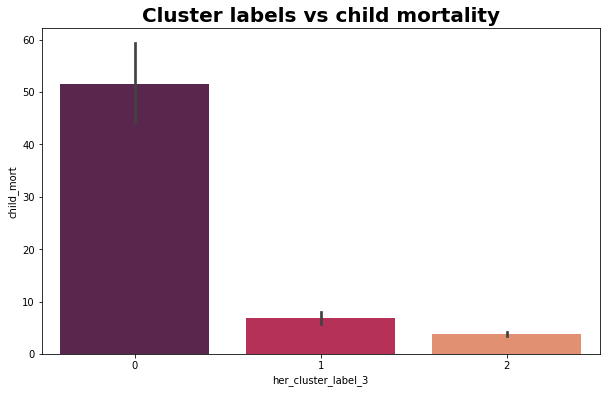

In [483]:
# Analysis of each cluster on the basis child morality rate.
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_label_3', y='child_mort', data=country_df_her,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

#### Inference:

- Cluster 0 indictes High Child mortality rate where as Cluster 1 and 2 seems to have medium and low Child mortality rate respectively.

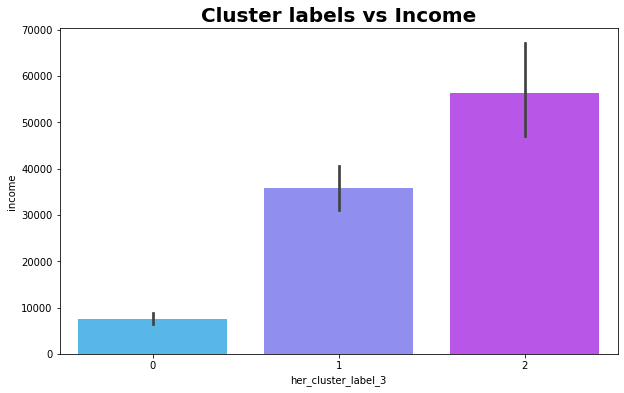

In [484]:
#Analysis of each cluster on the basis Income
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_label_3', y='income', data=country_df_her, palette='cool')
plt.title('Cluster labels vs Income',fontweight="bold", size=20)

plt.show()

#### Inference:

- Cluster 0 indictes Low Income where as Cluster 1 and 2 seems to have Medium and High Income respectively.

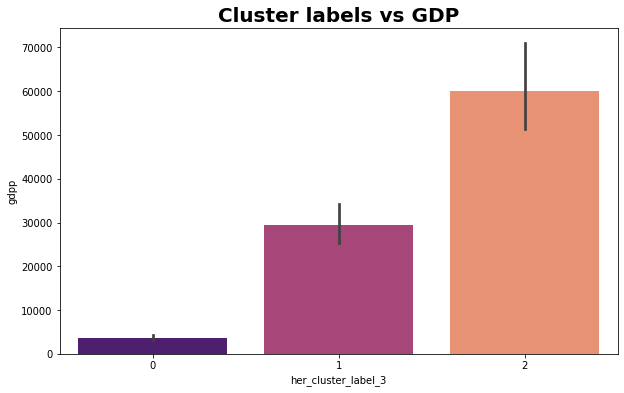

In [485]:
#Analysis of each cluster on the basis child morality rate.
plt.figure(figsize = (10,6))
sns.barplot(x='her_cluster_label_3', y='gdpp', data=country_df_her, palette='magma')
plt.title('Cluster labels vs GDP',fontweight="bold", size=20)

plt.show()

#### Inference:
- Cluster 0 indictes Low GDP where as Cluster 1 and 2 seems to have Medium and High GDP respectively.

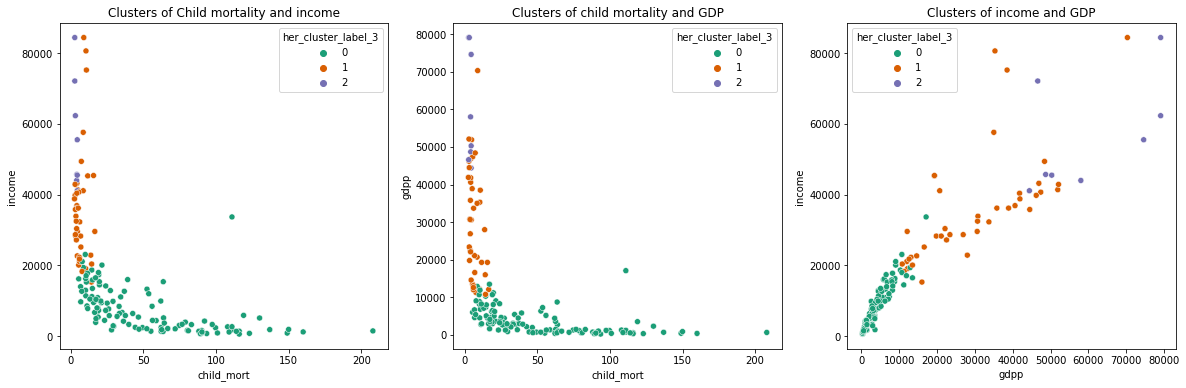

In [486]:
# Analysis of all three data points with all the three clusters
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='her_cluster_label_3',data=country_df_her, palette='Dark2')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='her_cluster_label_3',data=country_df_her, palette='Dark2')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='her_cluster_label_3',data=country_df_her,palette='Dark2')
plt.title('Clusters of income and GDP')
plt.show()

#### Inference: 
- Child mortality rate is higher at lower income groups indicating inadequate access to healthcare facilities. Vice versa is also true
- Under developed countries tend to have lower GDP and high mortality rate.
- GDP is directly proportional to the per capita income. Developed countries have a strong GDP and hence a higher per capita income.


## 6.5.1 Combine Analysis based on Child Mortality Rate, Per capita Income  and GDP per capita

In [487]:
# Dropping the Cluster label 4 as it is of no use
country_df_her.drop(["her_cluster_labels_4"],axis = 1, inplace = True)

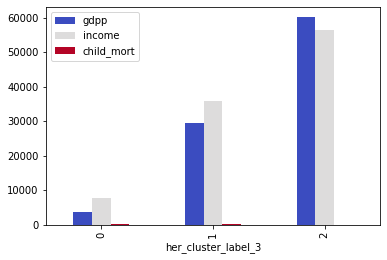

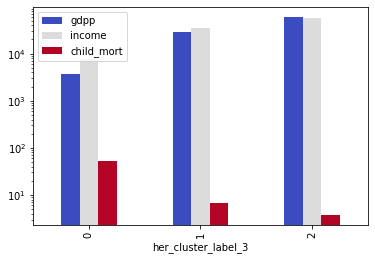

In [488]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_her[['gdpp', 'income', 'child_mort','her_cluster_label_3']].groupby('her_cluster_label_3').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### Inferences : 

- Cluster 0 : Those countries which are Under-developed as these countries has Low GDP ,Low Income and High Child mortality rate.
- Cluster 1 : Those countries which are Developing country as these countries has Medium GDP, Medium Income and Medium Child mortality rate.
- Cluster 2 : Those countries which are Developed country as these countries has High GDP ,High Income and Low Child morality rate

## 6.5.2 Renaming The Clusters

In [489]:
country_df_her.loc[country_df_her['her_cluster_label_3'] == 0,'her_cluster_label_3'] ='Under-Developed Country'
country_df_her.loc[country_df_her['her_cluster_label_3'] == 1,'her_cluster_label_3'] ='Developing Country'
country_df_her.loc[country_df_her['her_cluster_label_3'] == 2,'her_cluster_label_3'] ='Developed Country'

In [490]:
country_df_her.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,Under-Developed Country
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,Under-Developed Country
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,Under-Developed Country
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,Under-Developed Country
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,Developing Country


In [491]:
# Check the distribution of countries in each Clusters.
country_df_her["her_cluster_label_3"].value_counts()

Under-Developed Country    118
Developing Country          41
Developed Country            8
Name: her_cluster_label_3, dtype: int64

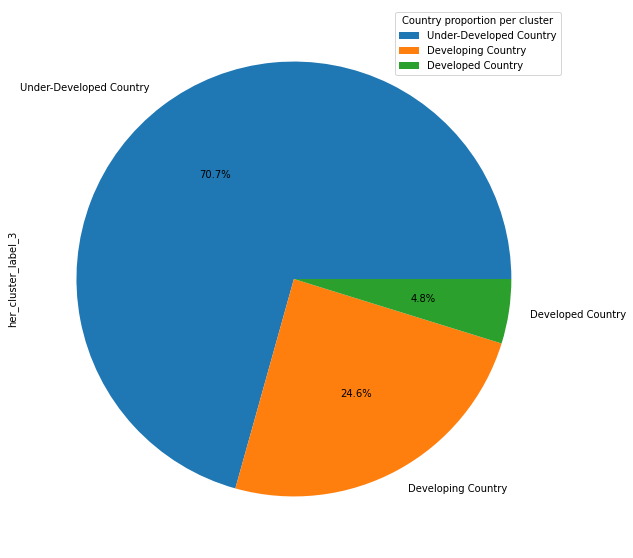

In [492]:
# Vizualising the Cluster
plt.figure(figsize=[15,10])
country_df_her["her_cluster_label_3"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

#### Inference:
> - Under-Develop has 70.7 %
> - Developing has 24.6%
> - Developed has 4.8%

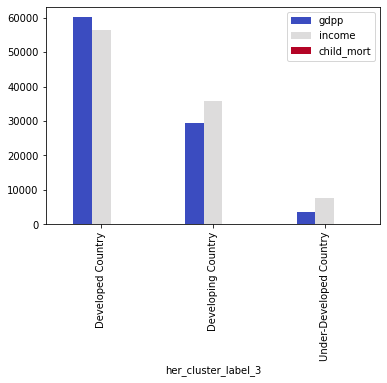

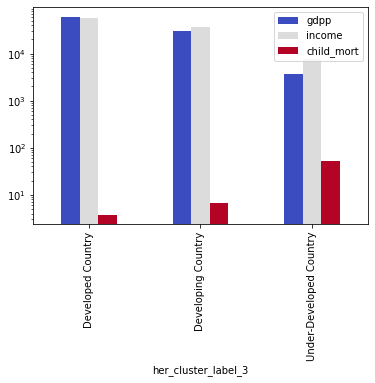

In [493]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_her[['gdpp', 'income', 'child_mort','her_cluster_label_3']].groupby('her_cluster_label_3').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### Inference
- Under-developed country : Countries having Low GDP ,Low Income and High Child mortality rate.
- Developing country : Countries having Medium GDP, Medium Income and Medium Child mortality rate.
- Developed country: Countries having High GDP ,High Income and Low Child morality rate

# 7 Final Analysis of Hierarchial Clustering

In [494]:
country_df_her[country_df_her['her_cluster_label_3'] == "Under-Developed Country" ].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,Under-Developed Country
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,Under-Developed Country
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,Under-Developed Country
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,Under-Developed Country
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.90,75.8,2.37,10300.0,Under-Developed Country


In [495]:
# List down the top 10 contries on the basis of "gdpp","Chil_mort"and "income"
HU_top10 = country_df_her[country_df_her['her_cluster_label_3'] == "Under-Developed Country"].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True]).head(10)
HU_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,Under-Developed Country
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,Under-Developed Country
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,Under-Developed Country
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,Under-Developed Country
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,Under-Developed Country
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,Under-Developed Country
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,Under-Developed Country
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,Under-Developed Country
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,Under-Developed Country
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,Under-Developed Country


In [496]:
# List down the top 10 contries on the basis of "gdpp","Chil_mort"and "income"
HD_top10 = country_df_her[country_df_her['her_cluster_label_3'] == "Developed Country"].sort_values(by = ['gdpp','child_mort','income'], ascending = [False, True, False]).head(10)
HD_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,her_cluster_label_3
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,Developed Country
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,Developed Country
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,Developed Country
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,Developed Country
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,Developed Country
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,Developed Country
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,Developed Country
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,Developed Country


# 7.1 Final List Of Countries

In [497]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
Final_hier_underdeveloped=HU_top10[['country']].head()
hier_underdeveloped= Final_hier_underdeveloped.reset_index(drop=True)
hier_underdeveloped

5 countries which are in direst need of aid based on hierarchical clustering


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


In [498]:
print("5 developed countries hierarchical clustering" )
Final_hier_developed=HD_top10[['country']].head()
hier_developed= Final_hier_developed.reset_index(drop=True)
hier_developed

5 developed countries hierarchical clustering


,country
0,Luxembourg
1,Norway
2,Switzerland
3,Denmark
4,Netherlands


# 8 K-Means Clustering

## 8.1 Elbow Curve/ SSD

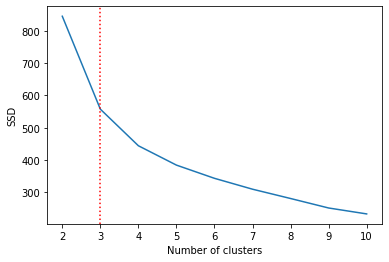

In [499]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

##### Inference:
- From Elbow curve indicates that elbow is at 3,4 and 5 are the optimal number of cluster.
- Let's analysis Silhouette Analysis as well and then get to an conclusion. But as elbow curve 3 will be optimum value of K. 

## 8.2 Silhouette score

For k_clusters=2, the silhouette score is 0.469475
For k_clusters=3, the silhouette score is 0.402781
For k_clusters=4, the silhouette score is 0.391242
For k_clusters=5, the silhouette score is 0.394621
For k_clusters=6, the silhouette score is 0.292508
For k_clusters=7, the silhouette score is 0.303099
For k_clusters=8, the silhouette score is 0.289998
For k_clusters=9, the silhouette score is 0.306546
For k_clusters=10, the silhouette score is 0.234398


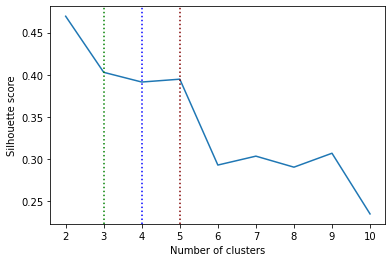

In [500]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(country_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))
    
temp = pd.DataFrame(silhouette_scores_list)    
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

#### Inference :
- From Silhouette Analysis 2 score the maximum. But consider 2 clusters will be very less. And the segmentation of the countries will be very different.
- After 2 if check for the next optimal value of clusters will be 3,4 & 5.
- From the Elbow curve and Silhouette Analysis can conclude that the best optimal number of cluster would be 3.
- Lets use K-means algorithm for values of k to be 3,4 & 5. And the check the result of  cluster Profiling.

## 8.3 K-means with Iteration 3,4 & 5

## 8.3.1 First Iteration with Cluster = 3

In [501]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 0)
kmeans_3.fit(country_scaled)
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [502]:
# assign cluster labels
country_df_K = country_df.copy()
country_df_K['K_Cluster_3_Label'] = kmeans_3.labels_
country_df_K.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [503]:
# Check the distribution of countries in each Clusters.
country_df_K["K_Cluster_3_Label"].value_counts()

2    90
0    48
1    29
Name: K_Cluster_3_Label, dtype: int64

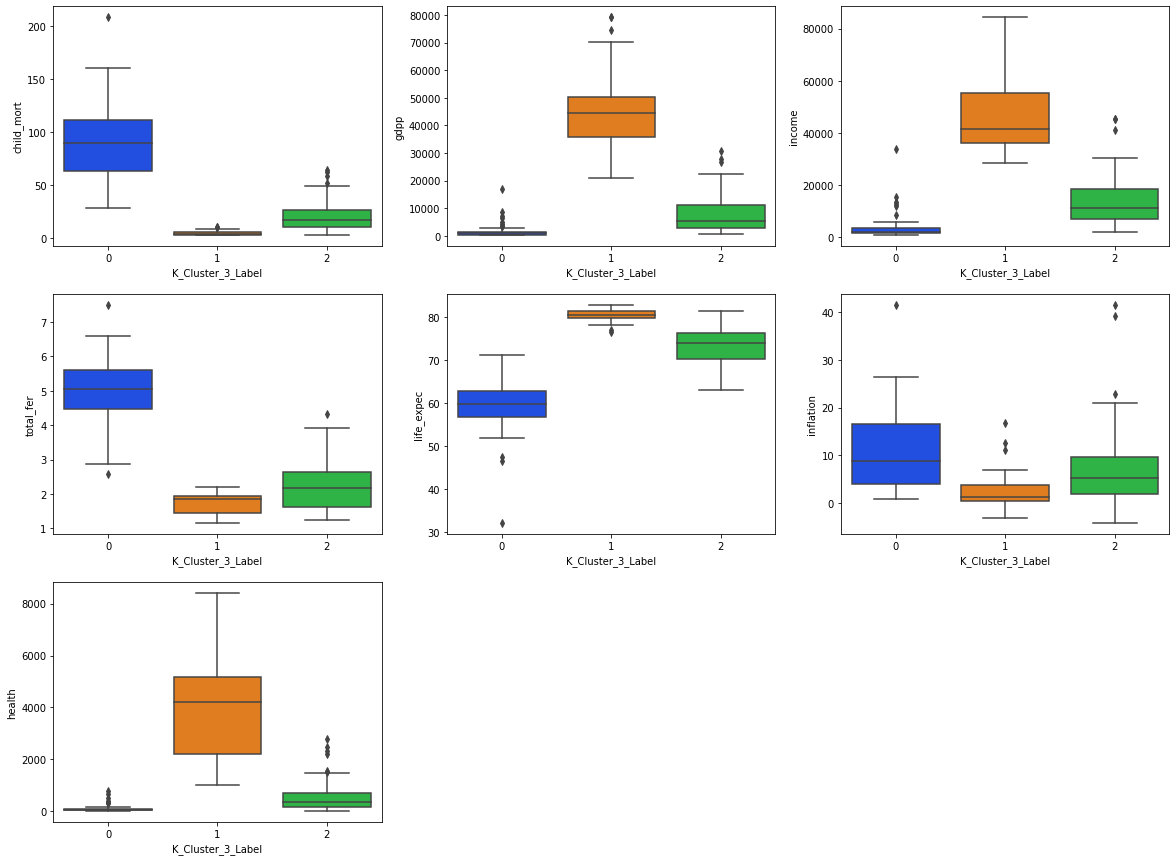

In [504]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='K_Cluster_3_Label', y='child_mort', data=country_df_K, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='K_Cluster_3_Label', y='gdpp', data=country_df_K, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='K_Cluster_3_Label', y='income', data=country_df_K, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='K_Cluster_3_Label', y='total_fer', data=country_df_K, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='K_Cluster_3_Label', y='life_expec', data=country_df_K, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='K_Cluster_3_Label', y='inflation', data=country_df_K, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='K_Cluster_3_Label', y='health', data=country_df_K, palette="bright")


plt.show()

#### Inference:

The information from the above graphs is summarized in the following table:

| Atribute | Cluster 0 | Cluster 1 | Cluster 2 |
|----------|-----------|-----------|-----------|
| Child Mortality | High | Low | Medium |
| GDPP | Low | High | Medium |
| Income | Low | High | Medium |
| Fertility | High | Low | Medium |
| Life Expectancy | Low | High | Medium |
| Inflation | High | Low | Medium |
| Health | Low | High | Medium |

In [505]:
# checking countries in cluster 2

country_df_K[country_df_K['K_Cluster_3_Label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.490,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.100,76.5,2.89,4460.0,2
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.440,76.8,2.13,12200.0,2
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.900,75.8,2.37,10300.0,2
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.770,73.3,1.69,3220.0,2
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.910,76.4,2.08,11900.0,2
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.500,68.8,2.34,1380.0,2
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.620,63.0,3.50,2970.0,2
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,41.478,75.4,2.47,13500.0,2


In [506]:
# checking countries in cluster 1

country_df_K[country_df_K['K_Cluster_3_Label'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,1
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,1
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,1
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.9,1.42,30800.0,1
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,1
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,1
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.758,80.1,1.39,41800.0,1


In [507]:
# checking countries in cluster 0

country_df_K[country_df_K['K_Cluster_3_Label'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


#### Inference:
> - The Distribution of the cluster in Kmeans is is quite Uniform distributed as compared to Hierarchial.
> - Let's Check Second Iteration and conclude the Final Analysis.

## 8.3.2  Second Iteration with Cluster = 4

In [508]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 0)
kmeans_4.fit(country_scaled)
kmeans_4.labels_

array([3, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3,
       0, 2, 0, 3, 3, 0, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 2, 2,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 2, 2, 3, 3, 0, 2, 3, 2, 0, 0, 3, 3, 0,
       3, 0, 2, 0, 0, 0, 3, 1, 2, 2, 0, 2, 0, 0, 3, 3, 2, 0, 3, 0, 0, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 2, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 1, 2, 2, 3, 3, 2, 2, 0, 0, 3, 0, 2, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3], dtype=int32)

In [509]:
# assign cluster labels
country_df_K["K_Cluster_4_Label"] = kmeans_4.labels_
country_df_K.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [510]:
# Check the distribution of countries in each Clusters.
country_df_K["K_Cluster_4_Label"].value_counts()

0    82
3    48
2    28
1     9
Name: K_Cluster_4_Label, dtype: int64

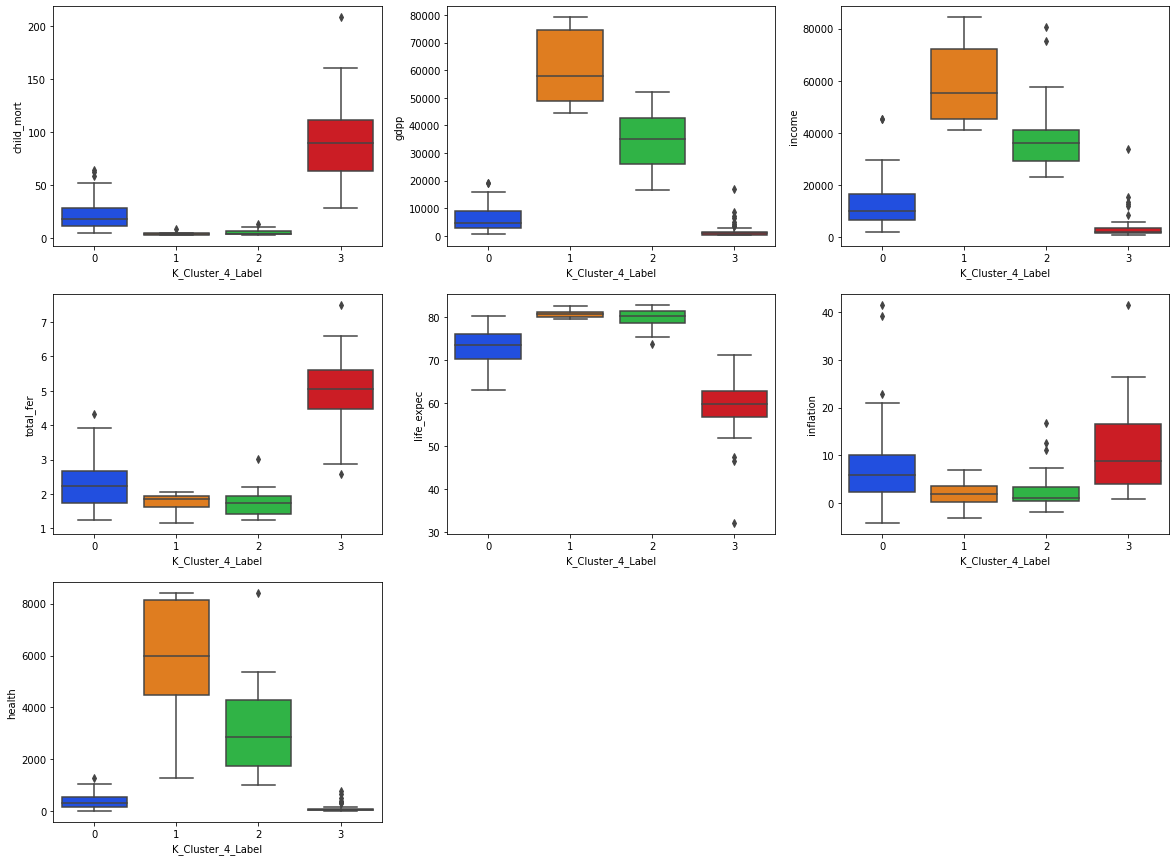

In [511]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='K_Cluster_4_Label', y='child_mort', data=country_df_K, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='K_Cluster_4_Label', y='gdpp', data=country_df_K, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='K_Cluster_4_Label', y='income', data=country_df_K, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='K_Cluster_4_Label', y='total_fer', data=country_df_K, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='K_Cluster_4_Label', y='life_expec', data=country_df_K, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='K_Cluster_4_Label', y='inflation', data=country_df_K, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='K_Cluster_4_Label', y='health', data=country_df_K, palette="bright")


plt.show()

#### Inference:
- In the second Iteration model has created a new cluster 3 with only Nine countries which has Low Child mortality rate,Fertility rate and Inflation and High GDP,Income,Life expectency and Helth
- The countries belongs to the cluster 3 can be consider to be developed countries

In [512]:
# checking countries in cluster 3

country_df_K[country_df_K['K_Cluster_4_Label'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,3
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,3
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,3
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,3
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,3
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,3
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,3
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,3
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,3
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0,3


In [513]:
# checking countries in cluster 2

country_df_K[country_df_K['K_Cluster_4_Label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
7,Australia,4.8,10276.2,4530.8700,10847.1,41400.0,1.160,82.0,1.93,51900.0,1,2
8,Austria,4.3,24059.7,5159.0000,22418.2,43200.0,0.873,80.5,1.44,46900.0,1,2
10,Bahamas,13.8,9800.0,2209.2000,12236.0,22900.0,-0.393,73.8,1.86,28000.0,2,2
11,Bahrain,8.6,14386.5,1028.7900,10536.3,41100.0,7.440,76.0,2.16,20700.0,2,2
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.700,77.1,1.84,35300.0,1,2
29,Canada,5.6,13793.4,5356.2000,14694.0,40700.0,2.870,81.3,1.63,47400.0,1,2
42,Cyprus,3.6,15461.6,1838.7600,17710.0,33900.0,2.010,79.9,1.42,30800.0,1,2
43,Czech Republic,3.4,13068.0,1560.2400,12454.2,28300.0,-1.430,77.5,1.51,19800.0,2,2
53,Finland,3.0,17879.4,4134.9000,17278.8,39800.0,0.351,80.0,1.87,46200.0,1,2
54,France,4.2,10880.8,4831.4000,11408.6,36900.0,1.050,81.4,2.03,40600.0,1,2


In [514]:
# checking countries in cluster 1

country_df_K[country_df_K['K_Cluster_4_Label'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,1,1
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,1,1
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,1,1
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,1,1
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,1,1
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,1,1
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,1,1
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,1,1
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,1,1


In [515]:
# checking countries in cluster 0

country_df_K[country_df_K['K_Cluster_4_Label'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.490,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.100,76.5,2.89,4460.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.440,76.8,2.13,12200.0,2,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.900,75.8,2.37,10300.0,2,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.770,73.3,1.69,3220.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.910,76.4,2.08,11900.0,2,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.500,68.8,2.34,1380.0,2,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.620,63.0,3.50,2970.0,2,0
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,41.478,75.4,2.47,13500.0,2,0


## 6.4 Third Iteration With Cluster = 5

In [516]:
# K Means with with k=3
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 0)
kmeans_5.fit(country_scaled)
kmeans_5.labels_

array([2, 4, 4, 0, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 3, 4, 2, 4, 4, 4, 2,
       4, 1, 4, 2, 2, 4, 2, 1, 4, 2, 2, 4, 4, 4, 2, 0, 0, 4, 2, 4, 1, 1,
       3, 4, 4, 4, 4, 0, 2, 4, 4, 1, 1, 0, 2, 4, 1, 0, 1, 4, 4, 2, 2, 4,
       2, 4, 1, 4, 4, 4, 0, 3, 1, 1, 4, 1, 4, 4, 2, 2, 1, 4, 2, 4, 4, 2,
       2, 4, 4, 3, 4, 2, 2, 4, 4, 2, 1, 0, 4, 4, 4, 0, 4, 4, 2, 4, 2, 4,
       3, 1, 2, 0, 3, 1, 2, 4, 4, 4, 4, 4, 1, 3, 4, 4, 2, 4, 1, 2, 4, 4,
       2, 3, 1, 1, 2, 2, 1, 1, 4, 4, 0, 4, 1, 3, 4, 2, 4, 0, 2, 4, 4, 4,
       4, 2, 4, 1, 1, 1, 4, 4, 4, 0, 4, 0, 2], dtype=int32)

In [517]:
country_df_K["K_Cluster_5_Label"] = kmeans_5.labels_
country_df_K.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label,K_Cluster_4_Label,K_Cluster_5_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,3,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0,4
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0,4
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,3,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0,4


In [518]:
# Check the distribution of countries in each Clusters.
country_df_K["K_Cluster_5_Label"].value_counts()

4    78
2    36
1    30
0    14
3     9
Name: K_Cluster_5_Label, dtype: int64

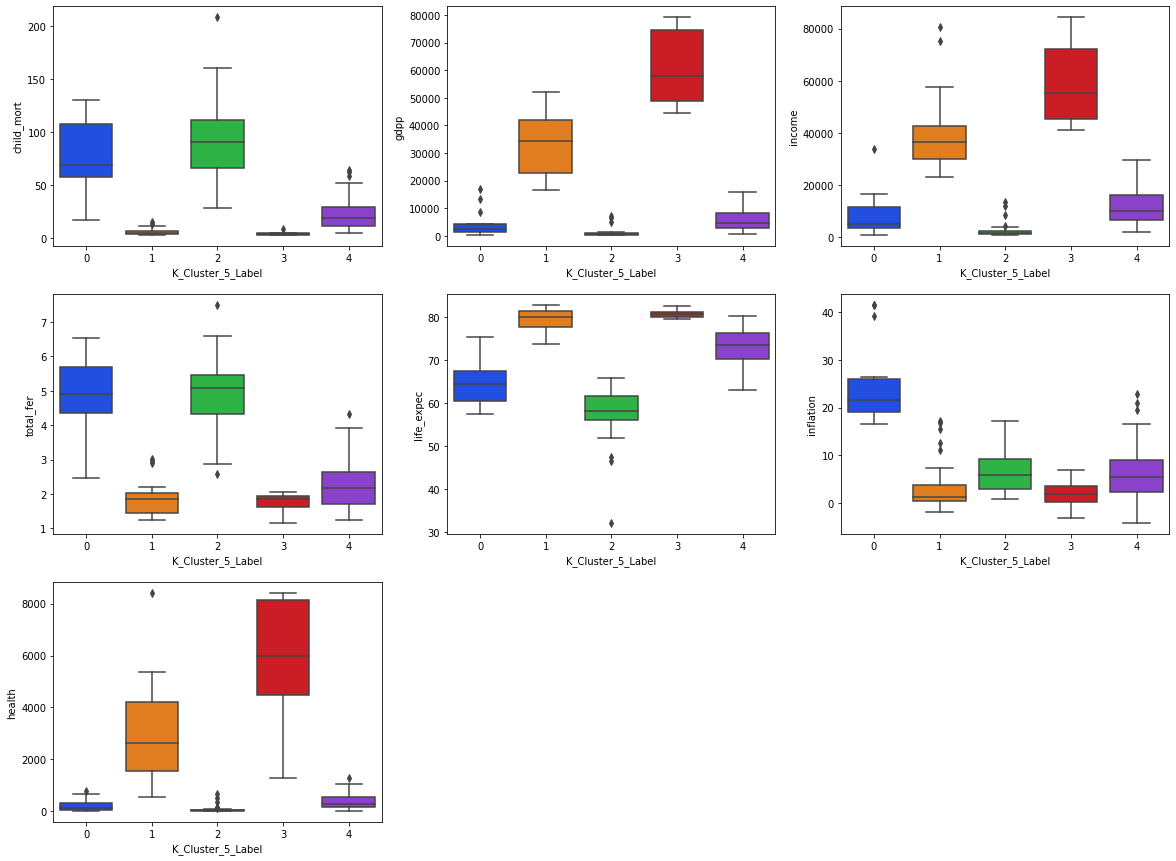

In [519]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='K_Cluster_5_Label', y='child_mort', data=country_df_K, palette="bright")
plt.subplot(3, 3, 2)
sns.boxplot(x='K_Cluster_5_Label', y='gdpp', data=country_df_K, palette="bright")
plt.subplot(3, 3, 3)
sns.boxplot(x='K_Cluster_5_Label', y='income', data=country_df_K, palette="bright")
plt.subplot(3, 3, 4)
sns.boxplot(x='K_Cluster_5_Label', y='total_fer', data=country_df_K, palette="bright")
plt.subplot(3, 3, 5)
sns.boxplot(x='K_Cluster_5_Label', y='life_expec', data=country_df_K, palette="bright")
plt.subplot(3, 3, 6)
sns.boxplot(x='K_Cluster_5_Label', y='inflation', data=country_df_K, palette="bright")
plt.subplot(3, 3, 7)
sns.boxplot(x='K_Cluster_5_Label', y='health', data=country_df_K, palette="bright")


plt.show()

#### Inference:
- From the box plots we can see that cluster 1 and cluster 4 both have High GDP,Income and Health spending.
- Above box plot we can see that both cluster 1 and cluster 4 has Low Child mortatlity,Fertility rate and low Inflation
- From the box plots we can see the both the cluster show similar pattern.Increasing the cluster doesn't make sense.
- Both the clusters indicates that the countries belong to these cluster are developed countries . Thus, we will not go with 5 cluster model. We will finalize with Model 1 with 3 K-Means Cluster models

## 8.4 K-means Cluster Profiling

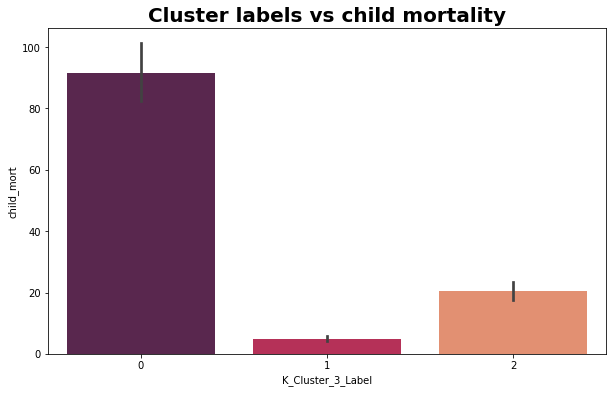

In [520]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='K_Cluster_3_Label', y='child_mort', data=country_df_K,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

#### Inference:

- Cluster 0 - High 
- Cluster 1 - Low
- Cluster 2 - Medium

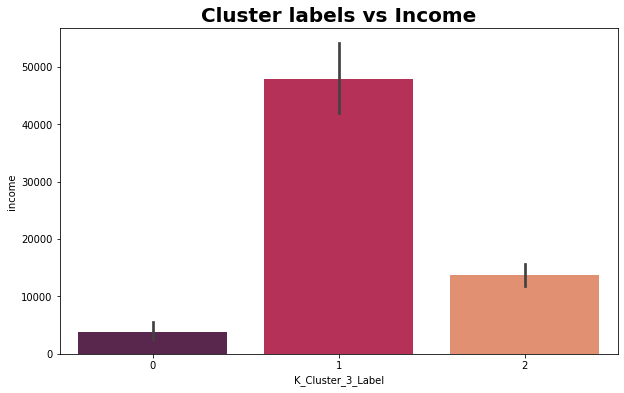

In [521]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='K_Cluster_3_Label', y='income', data=country_df_K,palette='rocket')
plt.title('Cluster labels vs Income',fontweight="bold", size=20)

plt.show()

#### Inference:

- Cluster 0 - Low 
- Cluster 1 - High
- Cluster 2 - Medium

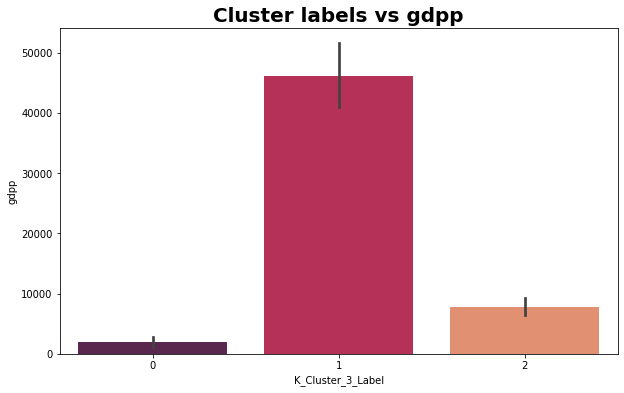

In [522]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='K_Cluster_3_Label', y='gdpp', data=country_df_K,palette='rocket')
plt.title('Cluster labels vs gdpp',fontweight="bold", size=20)

plt.show()

#### Inference:

- Cluster 0 - Low 
- Cluster 1 - High
- Cluster 2 - Medium

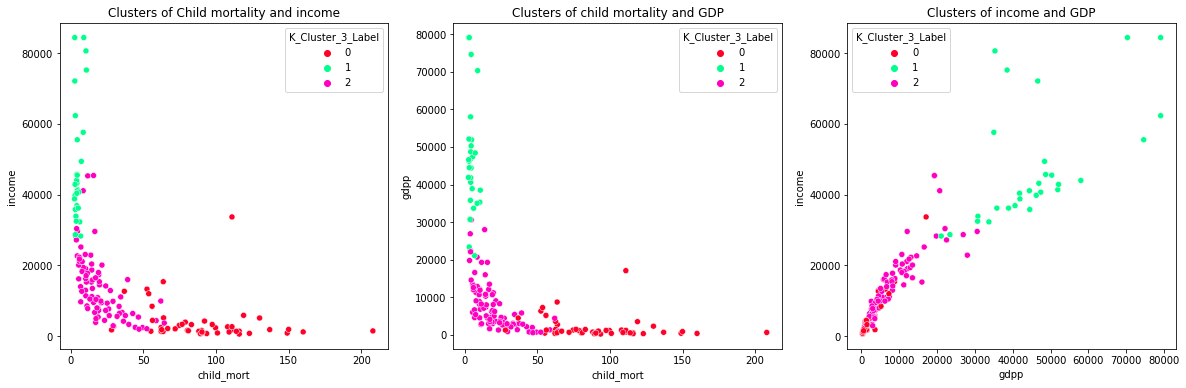

In [523]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='K_Cluster_3_Label',data=country_df_K,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

#### Inference:
- Child mortality rate is higher at lower income groups indicating inadequate access to healthcare facilities. Reverse of this is also true as can be seen from the graph.
- Under developed countries tend to have lower GDP and high mortality rate.
- GDP is directly proportional to the per capita income. Developed countries have a strong GDP and hence a higher per capita income.

## 8.3.1 Combine Analysis based on Child Mortality Rate, Per capita Income  and GDP per capita

In [524]:
country_df_K.drop(["K_Cluster_4_Label","K_Cluster_5_Label"],axis = 1, inplace = True)

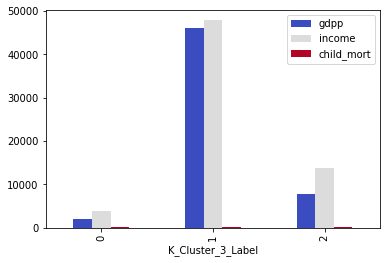

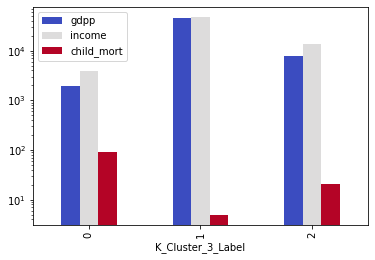

In [525]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_K[['gdpp', 'income', 'child_mort','K_Cluster_3_Label']].groupby('K_Cluster_3_Label').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

#### Inference:
> - 0 : Low GDPP, Low income and very high mortality rate.
> - 1 : High GDPP, High income and very low child mortality rate.
> - 2 : Medium GDPP, medium Income and mild child mortality rate.

## 8.3.2 Renaming The Clusters

In [526]:
country_df_K.loc[country_df_K['K_Cluster_3_Label'] == 0,'K_Cluster_3_Label'] ='Under-Developed Country'
country_df_K.loc[country_df_K['K_Cluster_3_Label'] == 1,'K_Cluster_3_Label'] ='Developed Country'
country_df_K.loc[country_df_K['K_Cluster_3_Label'] == 2,'K_Cluster_3_Label'] ='Developing Country'

In [527]:
country_df_K["K_Cluster_3_Label"].value_counts()

Developing Country         90
Under-Developed Country    48
Developed Country          29
Name: K_Cluster_3_Label, dtype: int64

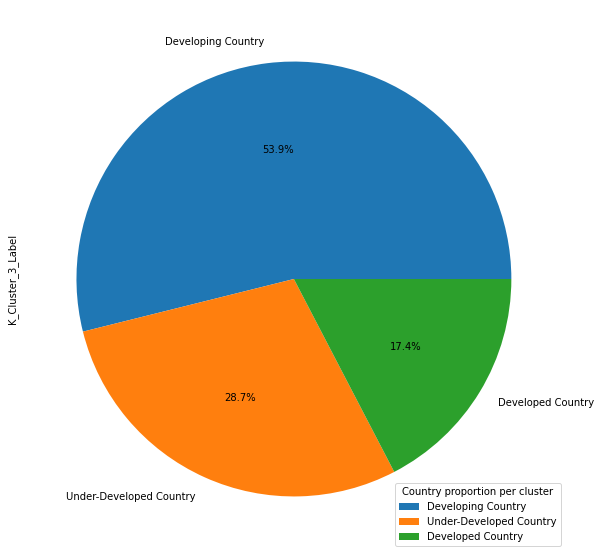

In [528]:
# Vizualising the Cluster
plt.figure(figsize=[15,10])
country_df_K["K_Cluster_3_Label"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.legend(title = "Country proportion per cluster")
plt.show()

#### Inference:
- Under-Developed country has 28.7%
- Developing country has 53.9%
- Developed country has 17.4%

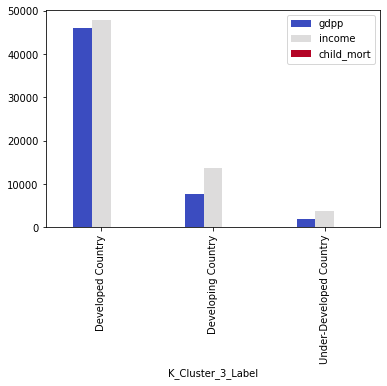

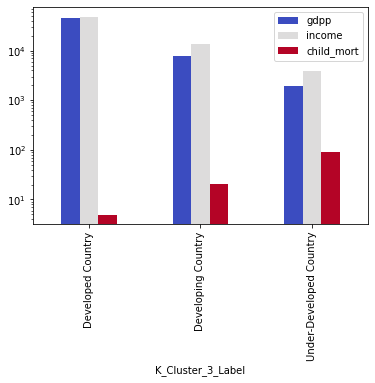

In [529]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df_K[['gdpp', 'income', 'child_mort','K_Cluster_3_Label']].groupby('K_Cluster_3_Label').mean()
grouped_df.plot(kind='bar', colormap='coolwarm')    
grouped_df.plot(kind='bar',logy=True, colormap='coolwarm')    
plt.show()

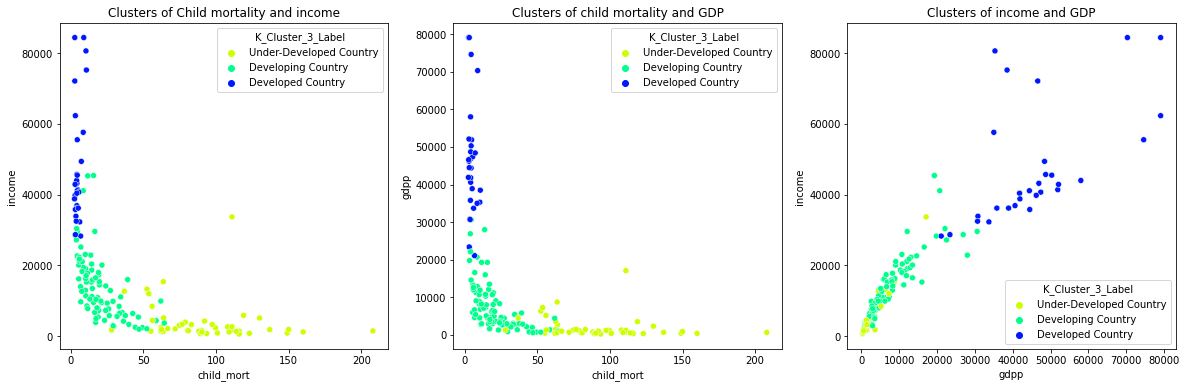

In [530]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='K_Cluster_3_Label',data=country_df_K, palette='gist_rainbow')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='K_Cluster_3_Label',data=country_df_K,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

#### Inference
- Under-developed country : Countries have Low GDP ,Low Income and High Child mortality rate.
- Developing country : Countries have Medium GDP, Medium Income and Medium Child mortality rate.
- Developed : Countries has High GDP,cHigh Income and Low Child morality rate

# 9 Final Analysis of K-means Clustering

In [531]:
# Final Analysis
country_df_K[country_df_K['K_Cluster_3_Label'] == "Under-Developed Country" ].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,Under-Developed Country
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,Under-Developed Country
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,Under-Developed Country
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,Under-Developed Country
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,Under-Developed Country


In [532]:
# Lists of Top 10 countries which are need of AID on the basis "gdpp","child_mort" and "income"
KU_top10 = country_df_K[country_df_K['K_Cluster_3_Label'] == "Under-Developed Country"].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True]).head(10)
KU_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.33,662.0,Under-Developed Country
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.20,399.0,Under-Developed Country
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,Under-Developed Country
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,Under-Developed Country
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.55,708.0,Under-Developed Country
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.84,2330.0,Under-Developed Country
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,Under-Developed Country
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,Under-Developed Country
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,Under-Developed Country
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,Under-Developed Country


In [533]:
# Lists of Top 10 countries which are need of AID on the basis "gdpp","child_mort" and "income"
KD_top10 = country_df_K[country_df_K['K_Cluster_3_Label'] == "Developed Country"].sort_values(by = ['gdpp','child_mort','income'], ascending = [False, True, False]).head(10)
KD_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Cluster_3_Label
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,Developed Country
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,Developed Country
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,Developed Country
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.980,79.5,2.07,70300.0,Developed Country
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,Developed Country
144,Sweden,3.0,24070.20,5017.2300,21204.70,42900.0,0.991,81.5,1.98,52100.0,Developed Country
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,Developed Country
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,Developed Country
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,Developed Country
159,United States,7.3,6001.60,8410.3304,7647.20,49400.0,1.220,78.7,1.93,48400.0,Developed Country


# 9.1 Final List Of Countries

In [534]:
print("5 countries with highest child mortality, low income and low GDP" )
Final_Kmeans_underdeveloped=KU_top10[['country']].head()
K_means_uc= Final_Kmeans_underdeveloped.reset_index(drop=True)
K_means_uc

5 countries with highest child mortality, low income and low GDP


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


In [535]:
print("5 countries with stable economy and strong GDP" )
Final_Kmeans_developed=KD_top10[['country']].head()
K_means_dc= Final_Kmeans_developed.reset_index(drop=True)
K_means_dc

5 countries with stable economy and strong GDP


,country
0,Luxembourg
1,Norway
2,Switzerland
3,Qatar
4,Denmark


# 10. Chosing cluster model

- Analysis using K-means and Hierarchical clustering indicates that both return same list of 10 countries which are in need of aid.
- Clusters made by K-means are evenly distributed as compared to the Hierarchical clustering. K-means shows better clustering mechanism 

### Hence choosing K-means as the Final model for clustering 

<Figure size 144x1800 with 0 Axes>

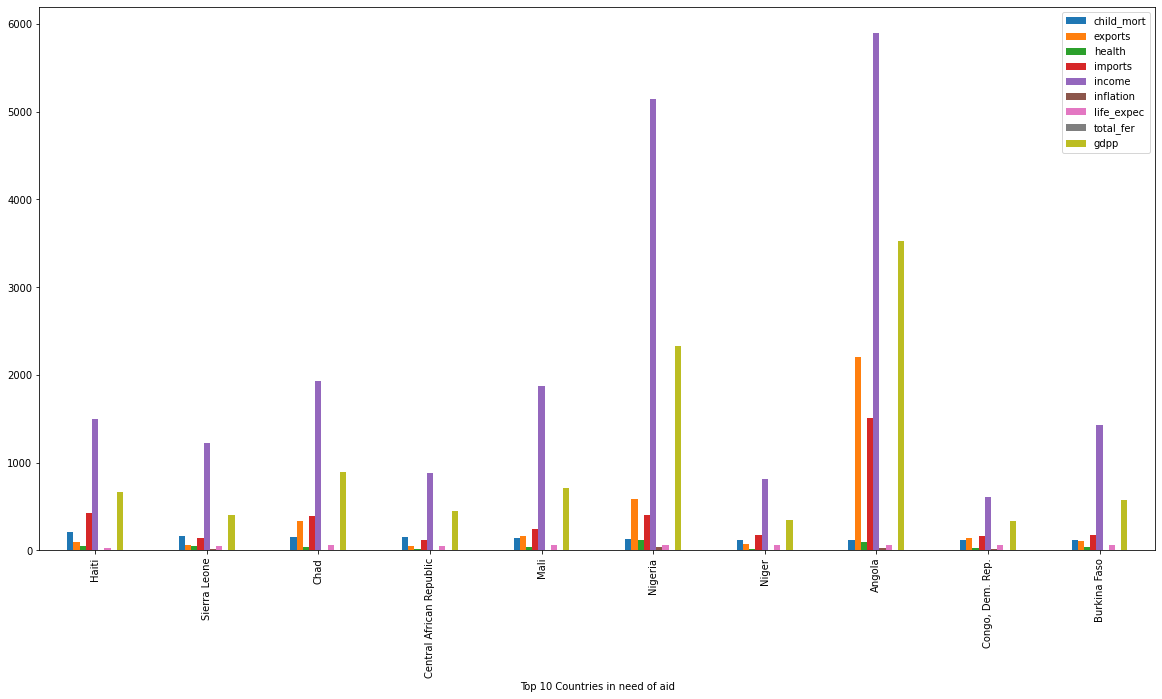

In [536]:
plt.figure(figsize=(2,25))
KU_top10.set_index('country').plot(kind='bar',figsize=(20,10))
plt.xlabel('Top 10 Countries in need of aid')
plt.show()


<Figure size 144x1800 with 0 Axes>

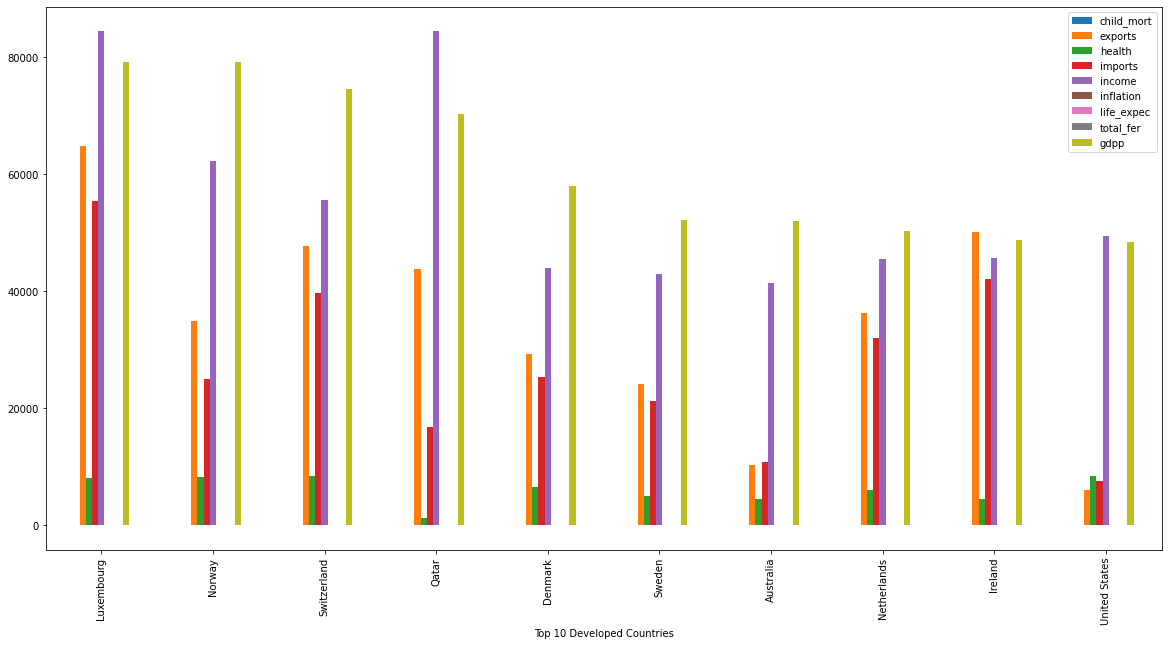

In [537]:
plt.figure(figsize=(2,25))
KD_top10.set_index('country').plot(kind='bar',figsize=(20,10))
plt.xlabel('Top 10 Developed Countries')
plt.show()

## Observation

### Factors influencing socio economic scenario of a country

The following factors influence the socio economic scenario of a country:

- Child mortality rate has a negative impact the social and economic stability of a country. Higher numbers translate to non-availability of adequate health services.
- Per capita income has a positive impact on the social and economic stability of a country. High per capita income translate to better standard of living, easy access to health services and overall a booming economy.
- GDP is a direct measure of the economic stability of a country. Higher GDP shows a country is economically stable and progressing. All developed countries have higher GDP when compared to under-developed or developing countries.
- Expenditure on health services has a positive impact on the social and economic status. It translates to higher per-capita income and easy access to better health infrastructure and facilities.
- Inflation has a negative impact on the socio economic scenario of a country. It has a direct impact on affordability of goods and services indicating a weaker economy.
- Higher life expectancy translates to easy access to health care.
- High fertility rate translates to lower per capita income resulting in lower GDP. Hence, higher fertility rate has a negative impact on the socio economic status of a country.



### Countries facing challenge with their economy and red/amber social health index

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali

### Countries with stable economy and healthy social index

- Luxembourg
- Norway
- Switzerland
- Qatar
- Denmark

## Recommendations

### Investment Strategy

Countries with higher GDP and per capita income can possibly offer better return of investment in terms of people and revenue. If a business is looking at expansion, or an individual is planning to set up a new business, the above analysis can help determine relatively safe regions/countries for investment.

However, there are other factors which can influence the choice of location. These factors can range from, but not limited to, nature of business, political scenario, foreign and domestic investment policies, availability of skilled labor, geaographical landscape of the region etc.

### CSR, Foreign Aid and Development Strategy

Countries with lower GDP and per capita income have a weak social index. These countries are in need of support to improve the quality of life and better access to basic services such as health and sanitary. 

While generating employment in these countries will definately help, they are in need of influx of funds which can be used to improve the basic services such as health care, sanitary and education. Firms and governments should consider distributing their aids and CSR funds based on the analysis to ensure a large part of society can be uplifted. 